# GAN Training

## imports

In [1]:
import os
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [3]:
(x_train, y_train) = load_safari(DATA_NAME)

In [4]:
x_train.shape

(80000, 28, 28, 1)

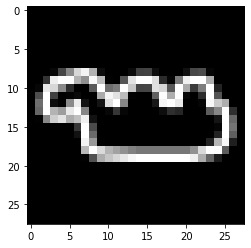

In [5]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

## architecture

In [6]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [7]:
gan.discriminator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa [(None, 28, 28, 1)]       0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation (Activation)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0     

In [8]:
gan.generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization (BatchNo (None, 3136)              12544     
_________________________________________________________________
activation_4 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       2049

## training

In [9]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [10]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

0 [D loss: (0.715)(R 0.696, F 0.734)] [D acc: (0.164)(0.328, 0.000)] [G loss: 0.683] [G acc: 1.000]
1 [D loss: (0.753)(R 0.654, F 0.853)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.687] [G acc: 1.000]
2 [D loss: (0.621)(R 0.537, F 0.705)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.219] [G acc: 1.000]
3 [D loss: (0.928)(R 0.007, F 1.850)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.642] [G acc: 0.984]
4 [D loss: (0.709)(R 0.542, F 0.875)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.629] [G acc: 1.000]
5 [D loss: (0.758)(R 0.536, F 0.979)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.652] [G acc: 1.000]
6 [D loss: (0.684)(R 0.611, F 0.758)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.634] [G acc: 1.000]
7 [D loss: (0.684)(R 0.597, F 0.771)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.600] [G acc: 1.000]
8 [D loss: (0.707)(R 0.586, F 0.828)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.615] [G acc: 1.000]
9 [D loss: (0.697)(R 0.612, F 0.782)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.610] [G acc: 1.000]


61 [D loss: (0.051)(R 0.005, F 0.098)] [D acc: (1.000)(1.000, 1.000)] [G loss: 2.845] [G acc: 0.016]
62 [D loss: (0.071)(R 0.006, F 0.136)] [D acc: (1.000)(1.000, 1.000)] [G loss: 3.396] [G acc: 0.000]
63 [D loss: (0.166)(R 0.246, F 0.086)] [D acc: (0.984)(0.969, 1.000)] [G loss: 2.940] [G acc: 0.000]
64 [D loss: (0.071)(R 0.007, F 0.135)] [D acc: (0.992)(1.000, 0.984)] [G loss: 5.929] [G acc: 0.000]
65 [D loss: (1.435)(R 0.554, F 2.316)] [D acc: (0.383)(0.766, 0.000)] [G loss: 1.810] [G acc: 0.000]
66 [D loss: (0.309)(R 0.111, F 0.508)] [D acc: (0.883)(0.984, 0.781)] [G loss: 2.274] [G acc: 0.000]
67 [D loss: (0.233)(R 0.244, F 0.221)] [D acc: (0.992)(0.984, 1.000)] [G loss: 2.470] [G acc: 0.000]
68 [D loss: (0.114)(R 0.089, F 0.140)] [D acc: (0.992)(1.000, 0.984)] [G loss: 3.185] [G acc: 0.000]
69 [D loss: (0.323)(R 0.215, F 0.431)] [D acc: (0.852)(0.922, 0.781)] [G loss: 4.243] [G acc: 0.000]
70 [D loss: (0.285)(R 0.319, F 0.252)] [D acc: (0.898)(0.891, 0.906)] [G loss: 4.167] [G ac

123 [D loss: (0.267)(R 0.294, F 0.241)] [D acc: (0.891)(0.891, 0.891)] [G loss: 0.227] [G acc: 1.000]
124 [D loss: (0.194)(R 0.140, F 0.248)] [D acc: (0.922)(0.984, 0.859)] [G loss: 0.306] [G acc: 0.969]
125 [D loss: (1.007)(R 0.382, F 1.632)] [D acc: (0.508)(0.875, 0.141)] [G loss: 0.854] [G acc: 0.234]
126 [D loss: (0.606)(R 0.516, F 0.696)] [D acc: (0.680)(0.859, 0.500)] [G loss: 0.866] [G acc: 0.188]
127 [D loss: (0.675)(R 0.429, F 0.922)] [D acc: (0.555)(0.922, 0.188)] [G loss: 1.200] [G acc: 0.016]
128 [D loss: (0.607)(R 0.464, F 0.751)] [D acc: (0.641)(0.891, 0.391)] [G loss: 1.102] [G acc: 0.000]
129 [D loss: (0.658)(R 0.486, F 0.830)] [D acc: (0.570)(0.844, 0.297)] [G loss: 1.026] [G acc: 0.000]
130 [D loss: (0.721)(R 0.683, F 0.758)] [D acc: (0.516)(0.562, 0.469)] [G loss: 0.852] [G acc: 0.078]
131 [D loss: (0.635)(R 0.576, F 0.695)] [D acc: (0.625)(0.656, 0.594)] [G loss: 0.837] [G acc: 0.109]
132 [D loss: (0.636)(R 0.533, F 0.739)] [D acc: (0.625)(0.734, 0.516)] [G loss: 0.

184 [D loss: (0.684)(R 0.686, F 0.682)] [D acc: (0.562)(0.516, 0.609)] [G loss: 0.762] [G acc: 0.109]
185 [D loss: (0.672)(R 0.664, F 0.681)] [D acc: (0.633)(0.609, 0.656)] [G loss: 0.799] [G acc: 0.047]
186 [D loss: (0.668)(R 0.636, F 0.700)] [D acc: (0.648)(0.703, 0.594)] [G loss: 0.803] [G acc: 0.016]
187 [D loss: (0.693)(R 0.637, F 0.750)] [D acc: (0.547)(0.672, 0.422)] [G loss: 0.784] [G acc: 0.031]
188 [D loss: (0.647)(R 0.664, F 0.630)] [D acc: (0.781)(0.609, 0.953)] [G loss: 0.863] [G acc: 0.016]
189 [D loss: (0.768)(R 0.573, F 0.964)] [D acc: (0.445)(0.703, 0.188)] [G loss: 0.850] [G acc: 0.016]
190 [D loss: (0.665)(R 0.677, F 0.654)] [D acc: (0.625)(0.547, 0.703)] [G loss: 0.833] [G acc: 0.031]
191 [D loss: (0.605)(R 0.628, F 0.581)] [D acc: (0.688)(0.594, 0.781)] [G loss: 0.908] [G acc: 0.094]
192 [D loss: (0.648)(R 0.599, F 0.696)] [D acc: (0.664)(0.750, 0.578)] [G loss: 0.909] [G acc: 0.000]
193 [D loss: (0.813)(R 0.520, F 1.106)] [D acc: (0.445)(0.812, 0.078)] [G loss: 0.

246 [D loss: (0.682)(R 0.677, F 0.688)] [D acc: (0.555)(0.531, 0.578)] [G loss: 0.794] [G acc: 0.172]
247 [D loss: (0.691)(R 0.683, F 0.699)] [D acc: (0.555)(0.516, 0.594)] [G loss: 1.050] [G acc: 0.016]
248 [D loss: (0.715)(R 0.806, F 0.624)] [D acc: (0.516)(0.297, 0.734)] [G loss: 0.853] [G acc: 0.078]
249 [D loss: (0.671)(R 0.636, F 0.705)] [D acc: (0.547)(0.562, 0.531)] [G loss: 0.812] [G acc: 0.125]
250 [D loss: (0.662)(R 0.642, F 0.681)] [D acc: (0.648)(0.688, 0.609)] [G loss: 0.808] [G acc: 0.234]
251 [D loss: (0.673)(R 0.639, F 0.706)] [D acc: (0.633)(0.719, 0.547)] [G loss: 0.815] [G acc: 0.156]
252 [D loss: (0.700)(R 0.683, F 0.716)] [D acc: (0.508)(0.500, 0.516)] [G loss: 0.816] [G acc: 0.156]
253 [D loss: (0.699)(R 0.653, F 0.745)] [D acc: (0.516)(0.578, 0.453)] [G loss: 0.789] [G acc: 0.234]
254 [D loss: (0.667)(R 0.632, F 0.702)] [D acc: (0.594)(0.703, 0.484)] [G loss: 0.904] [G acc: 0.125]
255 [D loss: (0.651)(R 0.676, F 0.625)] [D acc: (0.680)(0.578, 0.781)] [G loss: 0.

306 [D loss: (0.701)(R 0.654, F 0.748)] [D acc: (0.562)(0.609, 0.516)] [G loss: 0.911] [G acc: 0.125]
307 [D loss: (0.622)(R 0.638, F 0.606)] [D acc: (0.656)(0.609, 0.703)] [G loss: 0.904] [G acc: 0.219]
308 [D loss: (0.635)(R 0.603, F 0.667)] [D acc: (0.625)(0.672, 0.578)] [G loss: 0.989] [G acc: 0.062]
309 [D loss: (0.615)(R 0.550, F 0.680)] [D acc: (0.672)(0.703, 0.641)] [G loss: 0.999] [G acc: 0.156]
310 [D loss: (0.667)(R 0.601, F 0.733)] [D acc: (0.625)(0.672, 0.578)] [G loss: 1.169] [G acc: 0.078]
311 [D loss: (0.626)(R 0.645, F 0.608)] [D acc: (0.680)(0.625, 0.734)] [G loss: 1.040] [G acc: 0.047]
312 [D loss: (0.564)(R 0.510, F 0.617)] [D acc: (0.734)(0.734, 0.734)] [G loss: 1.066] [G acc: 0.141]
313 [D loss: (0.677)(R 0.447, F 0.907)] [D acc: (0.602)(0.781, 0.422)] [G loss: 1.063] [G acc: 0.125]
314 [D loss: (0.606)(R 0.590, F 0.622)] [D acc: (0.656)(0.656, 0.656)] [G loss: 1.011] [G acc: 0.078]
315 [D loss: (0.713)(R 0.639, F 0.787)] [D acc: (0.523)(0.625, 0.422)] [G loss: 1.

368 [D loss: (0.579)(R 0.636, F 0.523)] [D acc: (0.766)(0.656, 0.875)] [G loss: 1.184] [G acc: 0.047]
369 [D loss: (0.605)(R 0.610, F 0.601)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.179] [G acc: 0.062]
370 [D loss: (0.616)(R 0.557, F 0.676)] [D acc: (0.641)(0.703, 0.578)] [G loss: 1.122] [G acc: 0.125]
371 [D loss: (0.597)(R 0.589, F 0.604)] [D acc: (0.664)(0.625, 0.703)] [G loss: 1.081] [G acc: 0.094]
372 [D loss: (0.606)(R 0.533, F 0.679)] [D acc: (0.688)(0.703, 0.672)] [G loss: 1.339] [G acc: 0.047]
373 [D loss: (0.575)(R 0.615, F 0.535)] [D acc: (0.797)(0.688, 0.906)] [G loss: 1.153] [G acc: 0.078]
374 [D loss: (0.683)(R 0.556, F 0.810)] [D acc: (0.531)(0.641, 0.422)] [G loss: 1.103] [G acc: 0.094]
375 [D loss: (0.620)(R 0.575, F 0.666)] [D acc: (0.625)(0.609, 0.641)] [G loss: 1.151] [G acc: 0.062]
376 [D loss: (0.552)(R 0.522, F 0.582)] [D acc: (0.727)(0.719, 0.734)] [G loss: 1.106] [G acc: 0.125]
377 [D loss: (0.655)(R 0.607, F 0.703)] [D acc: (0.594)(0.609, 0.578)] [G loss: 1.

429 [D loss: (0.579)(R 0.486, F 0.671)] [D acc: (0.664)(0.734, 0.594)] [G loss: 1.157] [G acc: 0.156]
430 [D loss: (0.566)(R 0.536, F 0.597)] [D acc: (0.695)(0.625, 0.766)] [G loss: 1.138] [G acc: 0.094]
431 [D loss: (0.527)(R 0.501, F 0.552)] [D acc: (0.766)(0.734, 0.797)] [G loss: 1.133] [G acc: 0.125]
432 [D loss: (0.700)(R 0.516, F 0.883)] [D acc: (0.602)(0.719, 0.484)] [G loss: 1.190] [G acc: 0.141]
433 [D loss: (0.610)(R 0.614, F 0.606)] [D acc: (0.656)(0.562, 0.750)] [G loss: 1.157] [G acc: 0.062]
434 [D loss: (0.547)(R 0.462, F 0.631)] [D acc: (0.734)(0.766, 0.703)] [G loss: 1.104] [G acc: 0.125]
435 [D loss: (0.576)(R 0.484, F 0.668)] [D acc: (0.695)(0.719, 0.672)] [G loss: 1.439] [G acc: 0.031]
436 [D loss: (0.616)(R 0.670, F 0.561)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.187] [G acc: 0.094]
437 [D loss: (0.613)(R 0.605, F 0.620)] [D acc: (0.648)(0.594, 0.703)] [G loss: 1.287] [G acc: 0.062]
438 [D loss: (0.597)(R 0.692, F 0.501)] [D acc: (0.672)(0.500, 0.844)] [G loss: 1.

491 [D loss: (0.567)(R 0.581, F 0.553)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.200] [G acc: 0.094]
492 [D loss: (0.593)(R 0.557, F 0.629)] [D acc: (0.703)(0.734, 0.672)] [G loss: 1.293] [G acc: 0.109]
493 [D loss: (0.659)(R 0.691, F 0.628)] [D acc: (0.633)(0.484, 0.781)] [G loss: 1.144] [G acc: 0.156]
494 [D loss: (0.591)(R 0.478, F 0.703)] [D acc: (0.648)(0.656, 0.641)] [G loss: 1.200] [G acc: 0.031]
495 [D loss: (0.630)(R 0.702, F 0.559)] [D acc: (0.672)(0.531, 0.812)] [G loss: 1.078] [G acc: 0.078]
496 [D loss: (0.611)(R 0.534, F 0.688)] [D acc: (0.672)(0.688, 0.656)] [G loss: 1.205] [G acc: 0.062]
497 [D loss: (0.595)(R 0.669, F 0.522)] [D acc: (0.719)(0.594, 0.844)] [G loss: 1.085] [G acc: 0.125]
498 [D loss: (0.622)(R 0.558, F 0.686)] [D acc: (0.672)(0.703, 0.641)] [G loss: 1.262] [G acc: 0.094]
499 [D loss: (0.539)(R 0.599, F 0.480)] [D acc: (0.734)(0.578, 0.891)] [G loss: 1.151] [G acc: 0.078]
500 [D loss: (0.563)(R 0.509, F 0.616)] [D acc: (0.695)(0.734, 0.656)] [G loss: 1.

551 [D loss: (0.603)(R 0.572, F 0.634)] [D acc: (0.672)(0.672, 0.672)] [G loss: 1.049] [G acc: 0.125]
552 [D loss: (0.651)(R 0.558, F 0.743)] [D acc: (0.641)(0.656, 0.625)] [G loss: 1.078] [G acc: 0.062]
553 [D loss: (0.575)(R 0.649, F 0.501)] [D acc: (0.672)(0.469, 0.875)] [G loss: 1.028] [G acc: 0.156]
554 [D loss: (0.551)(R 0.541, F 0.562)] [D acc: (0.781)(0.719, 0.844)] [G loss: 1.165] [G acc: 0.125]
555 [D loss: (0.645)(R 0.634, F 0.657)] [D acc: (0.633)(0.562, 0.703)] [G loss: 1.312] [G acc: 0.094]
556 [D loss: (0.562)(R 0.639, F 0.485)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.236] [G acc: 0.016]
557 [D loss: (0.653)(R 0.471, F 0.835)] [D acc: (0.648)(0.766, 0.531)] [G loss: 1.016] [G acc: 0.094]
558 [D loss: (0.588)(R 0.580, F 0.597)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.228] [G acc: 0.094]
559 [D loss: (0.572)(R 0.584, F 0.559)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.172] [G acc: 0.078]
560 [D loss: (0.632)(R 0.619, F 0.645)] [D acc: (0.602)(0.594, 0.609)] [G loss: 1.

612 [D loss: (0.611)(R 0.620, F 0.603)] [D acc: (0.672)(0.609, 0.734)] [G loss: 1.193] [G acc: 0.125]
613 [D loss: (0.607)(R 0.638, F 0.576)] [D acc: (0.688)(0.578, 0.797)] [G loss: 1.310] [G acc: 0.031]
614 [D loss: (0.600)(R 0.613, F 0.586)] [D acc: (0.695)(0.719, 0.672)] [G loss: 1.117] [G acc: 0.094]
615 [D loss: (0.548)(R 0.501, F 0.595)] [D acc: (0.680)(0.672, 0.688)] [G loss: 1.223] [G acc: 0.062]
616 [D loss: (0.604)(R 0.582, F 0.627)] [D acc: (0.672)(0.609, 0.734)] [G loss: 1.210] [G acc: 0.062]
617 [D loss: (0.642)(R 0.729, F 0.555)] [D acc: (0.641)(0.469, 0.812)] [G loss: 1.120] [G acc: 0.188]
618 [D loss: (0.586)(R 0.550, F 0.623)] [D acc: (0.703)(0.703, 0.703)] [G loss: 1.189] [G acc: 0.109]
619 [D loss: (0.594)(R 0.633, F 0.554)] [D acc: (0.688)(0.578, 0.797)] [G loss: 1.142] [G acc: 0.031]
620 [D loss: (0.654)(R 0.547, F 0.761)] [D acc: (0.602)(0.672, 0.531)] [G loss: 1.074] [G acc: 0.062]
621 [D loss: (0.560)(R 0.495, F 0.625)] [D acc: (0.695)(0.703, 0.688)] [G loss: 1.

673 [D loss: (0.623)(R 0.566, F 0.680)] [D acc: (0.648)(0.688, 0.609)] [G loss: 1.150] [G acc: 0.141]
674 [D loss: (0.638)(R 0.664, F 0.612)] [D acc: (0.633)(0.547, 0.719)] [G loss: 1.097] [G acc: 0.141]
675 [D loss: (0.611)(R 0.642, F 0.580)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.142] [G acc: 0.109]
676 [D loss: (0.561)(R 0.563, F 0.558)] [D acc: (0.680)(0.641, 0.719)] [G loss: 1.202] [G acc: 0.078]
677 [D loss: (0.595)(R 0.602, F 0.588)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.507] [G acc: 0.062]
678 [D loss: (0.585)(R 0.669, F 0.500)] [D acc: (0.703)(0.547, 0.859)] [G loss: 1.235] [G acc: 0.062]
679 [D loss: (0.594)(R 0.581, F 0.608)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.131] [G acc: 0.125]
680 [D loss: (0.667)(R 0.535, F 0.800)] [D acc: (0.633)(0.688, 0.578)] [G loss: 1.163] [G acc: 0.094]
681 [D loss: (0.606)(R 0.642, F 0.569)] [D acc: (0.656)(0.578, 0.734)] [G loss: 1.188] [G acc: 0.094]
682 [D loss: (0.552)(R 0.568, F 0.537)] [D acc: (0.742)(0.625, 0.859)] [G loss: 1.

734 [D loss: (0.654)(R 0.765, F 0.542)] [D acc: (0.633)(0.484, 0.781)] [G loss: 1.081] [G acc: 0.125]
735 [D loss: (0.626)(R 0.675, F 0.578)] [D acc: (0.680)(0.562, 0.797)] [G loss: 1.000] [G acc: 0.172]
736 [D loss: (0.594)(R 0.512, F 0.677)] [D acc: (0.680)(0.703, 0.656)] [G loss: 1.129] [G acc: 0.109]
737 [D loss: (0.620)(R 0.611, F 0.630)] [D acc: (0.586)(0.562, 0.609)] [G loss: 1.108] [G acc: 0.094]
738 [D loss: (0.589)(R 0.612, F 0.566)] [D acc: (0.664)(0.594, 0.734)] [G loss: 1.190] [G acc: 0.094]
739 [D loss: (0.571)(R 0.626, F 0.515)] [D acc: (0.719)(0.609, 0.828)] [G loss: 1.127] [G acc: 0.141]
740 [D loss: (0.602)(R 0.545, F 0.659)] [D acc: (0.664)(0.719, 0.609)] [G loss: 1.176] [G acc: 0.125]
741 [D loss: (0.548)(R 0.580, F 0.517)] [D acc: (0.711)(0.609, 0.812)] [G loss: 1.226] [G acc: 0.078]
742 [D loss: (0.623)(R 0.473, F 0.774)] [D acc: (0.656)(0.766, 0.547)] [G loss: 1.295] [G acc: 0.094]
743 [D loss: (0.570)(R 0.576, F 0.565)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.

796 [D loss: (0.550)(R 0.449, F 0.651)] [D acc: (0.664)(0.703, 0.625)] [G loss: 1.341] [G acc: 0.047]
797 [D loss: (0.641)(R 0.672, F 0.611)] [D acc: (0.625)(0.547, 0.703)] [G loss: 1.166] [G acc: 0.109]
798 [D loss: (0.502)(R 0.510, F 0.493)] [D acc: (0.766)(0.703, 0.828)] [G loss: 1.278] [G acc: 0.141]
799 [D loss: (0.511)(R 0.468, F 0.555)] [D acc: (0.781)(0.812, 0.750)] [G loss: 1.344] [G acc: 0.062]
800 [D loss: (0.668)(R 0.670, F 0.667)] [D acc: (0.641)(0.609, 0.672)] [G loss: 1.311] [G acc: 0.094]
801 [D loss: (0.642)(R 0.650, F 0.634)] [D acc: (0.672)(0.562, 0.781)] [G loss: 1.245] [G acc: 0.125]
802 [D loss: (0.631)(R 0.660, F 0.602)] [D acc: (0.633)(0.578, 0.688)] [G loss: 1.112] [G acc: 0.094]
803 [D loss: (0.569)(R 0.573, F 0.564)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.257] [G acc: 0.141]
804 [D loss: (0.666)(R 0.657, F 0.674)] [D acc: (0.609)(0.547, 0.672)] [G loss: 1.227] [G acc: 0.156]
805 [D loss: (0.516)(R 0.528, F 0.503)] [D acc: (0.766)(0.734, 0.797)] [G loss: 1.

856 [D loss: (0.582)(R 0.604, F 0.559)] [D acc: (0.711)(0.609, 0.812)] [G loss: 1.123] [G acc: 0.219]
857 [D loss: (0.620)(R 0.570, F 0.670)] [D acc: (0.656)(0.609, 0.703)] [G loss: 1.259] [G acc: 0.172]
858 [D loss: (0.553)(R 0.594, F 0.512)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.154] [G acc: 0.156]
859 [D loss: (0.547)(R 0.531, F 0.562)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.185] [G acc: 0.172]
860 [D loss: (0.569)(R 0.437, F 0.701)] [D acc: (0.695)(0.734, 0.656)] [G loss: 1.277] [G acc: 0.109]
861 [D loss: (0.588)(R 0.646, F 0.530)] [D acc: (0.688)(0.562, 0.812)] [G loss: 1.063] [G acc: 0.188]
862 [D loss: (0.561)(R 0.550, F 0.572)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.164] [G acc: 0.141]
863 [D loss: (0.532)(R 0.516, F 0.549)] [D acc: (0.750)(0.672, 0.828)] [G loss: 1.286] [G acc: 0.125]
864 [D loss: (0.664)(R 0.614, F 0.713)] [D acc: (0.664)(0.656, 0.672)] [G loss: 1.168] [G acc: 0.062]
865 [D loss: (0.608)(R 0.653, F 0.562)] [D acc: (0.688)(0.578, 0.797)] [G loss: 1.

918 [D loss: (0.598)(R 0.692, F 0.504)] [D acc: (0.703)(0.531, 0.875)] [G loss: 1.190] [G acc: 0.172]
919 [D loss: (0.599)(R 0.585, F 0.613)] [D acc: (0.617)(0.594, 0.641)] [G loss: 1.160] [G acc: 0.109]
920 [D loss: (0.614)(R 0.526, F 0.702)] [D acc: (0.672)(0.719, 0.625)] [G loss: 1.199] [G acc: 0.078]
921 [D loss: (0.534)(R 0.515, F 0.552)] [D acc: (0.727)(0.703, 0.750)] [G loss: 1.130] [G acc: 0.125]
922 [D loss: (0.555)(R 0.528, F 0.582)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.159] [G acc: 0.188]
923 [D loss: (0.519)(R 0.488, F 0.550)] [D acc: (0.742)(0.750, 0.734)] [G loss: 1.650] [G acc: 0.031]
924 [D loss: (0.674)(R 0.826, F 0.522)] [D acc: (0.664)(0.500, 0.828)] [G loss: 1.297] [G acc: 0.078]
925 [D loss: (0.599)(R 0.510, F 0.689)] [D acc: (0.719)(0.734, 0.703)] [G loss: 1.129] [G acc: 0.188]
926 [D loss: (0.552)(R 0.563, F 0.541)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.287] [G acc: 0.094]
927 [D loss: (0.619)(R 0.547, F 0.691)] [D acc: (0.695)(0.625, 0.766)] [G loss: 1.

979 [D loss: (0.657)(R 0.645, F 0.669)] [D acc: (0.672)(0.656, 0.688)] [G loss: 1.246] [G acc: 0.172]
980 [D loss: (0.532)(R 0.547, F 0.516)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.361] [G acc: 0.172]
981 [D loss: (0.570)(R 0.551, F 0.590)] [D acc: (0.719)(0.625, 0.812)] [G loss: 1.332] [G acc: 0.156]
982 [D loss: (0.574)(R 0.573, F 0.575)] [D acc: (0.688)(0.672, 0.703)] [G loss: 1.310] [G acc: 0.078]
983 [D loss: (0.522)(R 0.513, F 0.531)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.510] [G acc: 0.047]
984 [D loss: (0.592)(R 0.674, F 0.509)] [D acc: (0.758)(0.625, 0.891)] [G loss: 1.093] [G acc: 0.172]
985 [D loss: (0.532)(R 0.447, F 0.616)] [D acc: (0.742)(0.719, 0.766)] [G loss: 1.276] [G acc: 0.109]
986 [D loss: (0.522)(R 0.420, F 0.623)] [D acc: (0.766)(0.781, 0.750)] [G loss: 1.261] [G acc: 0.109]
987 [D loss: (0.572)(R 0.525, F 0.620)] [D acc: (0.719)(0.719, 0.719)] [G loss: 1.421] [G acc: 0.047]
988 [D loss: (0.554)(R 0.470, F 0.638)] [D acc: (0.711)(0.734, 0.688)] [G loss: 1.

1039 [D loss: (0.528)(R 0.530, F 0.526)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.291] [G acc: 0.141]
1040 [D loss: (0.504)(R 0.456, F 0.551)] [D acc: (0.805)(0.750, 0.859)] [G loss: 1.436] [G acc: 0.109]
1041 [D loss: (0.517)(R 0.531, F 0.503)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.407] [G acc: 0.156]
1042 [D loss: (0.579)(R 0.599, F 0.558)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.345] [G acc: 0.094]
1043 [D loss: (0.569)(R 0.540, F 0.598)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.387] [G acc: 0.062]
1044 [D loss: (0.540)(R 0.523, F 0.556)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.370] [G acc: 0.109]
1045 [D loss: (0.536)(R 0.507, F 0.566)] [D acc: (0.742)(0.719, 0.766)] [G loss: 1.230] [G acc: 0.188]
1046 [D loss: (0.553)(R 0.524, F 0.582)] [D acc: (0.688)(0.672, 0.703)] [G loss: 1.431] [G acc: 0.078]
1047 [D loss: (0.685)(R 0.613, F 0.756)] [D acc: (0.656)(0.703, 0.609)] [G loss: 1.361] [G acc: 0.109]
1048 [D loss: (0.622)(R 0.545, F 0.698)] [D acc: (0.633)(0.625, 0.641)] [

1099 [D loss: (0.659)(R 0.666, F 0.652)] [D acc: (0.609)(0.594, 0.625)] [G loss: 1.294] [G acc: 0.125]
1100 [D loss: (0.585)(R 0.652, F 0.517)] [D acc: (0.680)(0.578, 0.781)] [G loss: 1.305] [G acc: 0.094]
1101 [D loss: (0.602)(R 0.531, F 0.674)] [D acc: (0.664)(0.641, 0.688)] [G loss: 1.236] [G acc: 0.094]
1102 [D loss: (0.633)(R 0.742, F 0.523)] [D acc: (0.625)(0.484, 0.766)] [G loss: 1.200] [G acc: 0.109]
1103 [D loss: (0.601)(R 0.620, F 0.581)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.225] [G acc: 0.141]
1104 [D loss: (0.531)(R 0.521, F 0.541)] [D acc: (0.766)(0.719, 0.812)] [G loss: 1.257] [G acc: 0.062]
1105 [D loss: (0.526)(R 0.543, F 0.509)] [D acc: (0.719)(0.609, 0.828)] [G loss: 1.234] [G acc: 0.094]
1106 [D loss: (0.553)(R 0.565, F 0.542)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.198] [G acc: 0.109]
1107 [D loss: (0.549)(R 0.517, F 0.582)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.255] [G acc: 0.062]
1108 [D loss: (0.598)(R 0.594, F 0.603)] [D acc: (0.703)(0.656, 0.750)] [

1159 [D loss: (0.605)(R 0.669, F 0.541)] [D acc: (0.680)(0.547, 0.812)] [G loss: 1.369] [G acc: 0.094]
1160 [D loss: (0.515)(R 0.501, F 0.530)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.399] [G acc: 0.125]
1161 [D loss: (0.473)(R 0.483, F 0.464)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.544] [G acc: 0.109]
1162 [D loss: (0.443)(R 0.458, F 0.427)] [D acc: (0.820)(0.750, 0.891)] [G loss: 1.510] [G acc: 0.062]
1163 [D loss: (0.457)(R 0.486, F 0.429)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.519] [G acc: 0.031]
1164 [D loss: (0.550)(R 0.566, F 0.534)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.572] [G acc: 0.047]
1165 [D loss: (0.517)(R 0.593, F 0.442)] [D acc: (0.781)(0.688, 0.875)] [G loss: 1.612] [G acc: 0.016]
1166 [D loss: (0.467)(R 0.361, F 0.573)] [D acc: (0.828)(0.844, 0.812)] [G loss: 1.511] [G acc: 0.062]
1167 [D loss: (0.606)(R 0.592, F 0.619)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.432] [G acc: 0.109]
1168 [D loss: (0.547)(R 0.512, F 0.582)] [D acc: (0.727)(0.688, 0.766)] [

1219 [D loss: (0.479)(R 0.471, F 0.488)] [D acc: (0.789)(0.688, 0.891)] [G loss: 1.517] [G acc: 0.078]
1220 [D loss: (0.434)(R 0.323, F 0.544)] [D acc: (0.805)(0.797, 0.812)] [G loss: 1.576] [G acc: 0.078]
1221 [D loss: (0.528)(R 0.492, F 0.564)] [D acc: (0.781)(0.719, 0.844)] [G loss: 1.442] [G acc: 0.141]
1222 [D loss: (0.506)(R 0.478, F 0.534)] [D acc: (0.734)(0.719, 0.750)] [G loss: 1.548] [G acc: 0.156]
1223 [D loss: (0.554)(R 0.479, F 0.628)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.429] [G acc: 0.094]
1224 [D loss: (0.605)(R 0.719, F 0.491)] [D acc: (0.695)(0.562, 0.828)] [G loss: 1.555] [G acc: 0.188]
1225 [D loss: (0.571)(R 0.609, F 0.533)] [D acc: (0.703)(0.656, 0.750)] [G loss: 1.481] [G acc: 0.094]
1226 [D loss: (0.563)(R 0.507, F 0.619)] [D acc: (0.711)(0.688, 0.734)] [G loss: 1.476] [G acc: 0.062]
1227 [D loss: (0.585)(R 0.566, F 0.603)] [D acc: (0.742)(0.719, 0.766)] [G loss: 1.362] [G acc: 0.078]
1228 [D loss: (0.517)(R 0.503, F 0.532)] [D acc: (0.719)(0.688, 0.750)] [

1279 [D loss: (0.491)(R 0.523, F 0.460)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.433] [G acc: 0.078]
1280 [D loss: (0.665)(R 0.612, F 0.719)] [D acc: (0.641)(0.656, 0.625)] [G loss: 1.402] [G acc: 0.078]
1281 [D loss: (0.530)(R 0.523, F 0.538)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.275] [G acc: 0.141]
1282 [D loss: (0.557)(R 0.549, F 0.566)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.381] [G acc: 0.094]
1283 [D loss: (0.634)(R 0.763, F 0.504)] [D acc: (0.719)(0.578, 0.859)] [G loss: 1.341] [G acc: 0.078]
1284 [D loss: (0.492)(R 0.496, F 0.489)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.103] [G acc: 0.125]
1285 [D loss: (0.522)(R 0.418, F 0.626)] [D acc: (0.727)(0.750, 0.703)] [G loss: 1.302] [G acc: 0.047]
1286 [D loss: (0.488)(R 0.491, F 0.485)] [D acc: (0.758)(0.734, 0.781)] [G loss: 1.394] [G acc: 0.156]
1287 [D loss: (0.547)(R 0.566, F 0.527)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.316] [G acc: 0.094]
1288 [D loss: (0.557)(R 0.526, F 0.587)] [D acc: (0.711)(0.656, 0.766)] [

1339 [D loss: (0.520)(R 0.531, F 0.509)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.429] [G acc: 0.062]
1340 [D loss: (0.538)(R 0.530, F 0.546)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.330] [G acc: 0.094]
1341 [D loss: (0.537)(R 0.583, F 0.491)] [D acc: (0.680)(0.531, 0.828)] [G loss: 1.368] [G acc: 0.109]
1342 [D loss: (0.578)(R 0.629, F 0.528)] [D acc: (0.680)(0.578, 0.781)] [G loss: 1.371] [G acc: 0.094]
1343 [D loss: (0.483)(R 0.443, F 0.523)] [D acc: (0.781)(0.750, 0.812)] [G loss: 1.468] [G acc: 0.094]
1344 [D loss: (0.587)(R 0.553, F 0.622)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.617] [G acc: 0.078]
1345 [D loss: (0.532)(R 0.607, F 0.457)] [D acc: (0.758)(0.609, 0.906)] [G loss: 1.358] [G acc: 0.109]
1346 [D loss: (0.521)(R 0.525, F 0.518)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.293] [G acc: 0.078]
1347 [D loss: (0.526)(R 0.530, F 0.522)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.458] [G acc: 0.062]
1348 [D loss: (0.555)(R 0.493, F 0.617)] [D acc: (0.758)(0.734, 0.781)] [

1399 [D loss: (0.546)(R 0.509, F 0.584)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.488] [G acc: 0.047]
1400 [D loss: (0.516)(R 0.480, F 0.552)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.349] [G acc: 0.094]
1401 [D loss: (0.471)(R 0.498, F 0.444)] [D acc: (0.789)(0.719, 0.859)] [G loss: 1.477] [G acc: 0.047]
1402 [D loss: (0.453)(R 0.437, F 0.470)] [D acc: (0.789)(0.734, 0.844)] [G loss: 1.619] [G acc: 0.047]
1403 [D loss: (0.590)(R 0.573, F 0.607)] [D acc: (0.688)(0.578, 0.797)] [G loss: 1.401] [G acc: 0.062]
1404 [D loss: (0.539)(R 0.604, F 0.474)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.326] [G acc: 0.125]
1405 [D loss: (0.550)(R 0.517, F 0.583)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.304] [G acc: 0.109]
1406 [D loss: (0.578)(R 0.628, F 0.528)] [D acc: (0.695)(0.578, 0.812)] [G loss: 1.329] [G acc: 0.125]
1407 [D loss: (0.540)(R 0.522, F 0.558)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.302] [G acc: 0.141]
1408 [D loss: (0.430)(R 0.386, F 0.474)] [D acc: (0.852)(0.828, 0.875)] [

1459 [D loss: (0.465)(R 0.338, F 0.592)] [D acc: (0.781)(0.828, 0.734)] [G loss: 1.409] [G acc: 0.078]
1460 [D loss: (0.520)(R 0.484, F 0.556)] [D acc: (0.734)(0.719, 0.750)] [G loss: 1.579] [G acc: 0.078]
1461 [D loss: (0.564)(R 0.603, F 0.525)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.589] [G acc: 0.062]
1462 [D loss: (0.634)(R 0.798, F 0.471)] [D acc: (0.680)(0.484, 0.875)] [G loss: 1.585] [G acc: 0.109]
1463 [D loss: (0.566)(R 0.443, F 0.689)] [D acc: (0.758)(0.766, 0.750)] [G loss: 1.474] [G acc: 0.141]
1464 [D loss: (0.573)(R 0.576, F 0.570)] [D acc: (0.680)(0.672, 0.688)] [G loss: 1.424] [G acc: 0.078]
1465 [D loss: (0.479)(R 0.494, F 0.465)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.326] [G acc: 0.125]
1466 [D loss: (0.491)(R 0.465, F 0.517)] [D acc: (0.781)(0.766, 0.797)] [G loss: 1.569] [G acc: 0.094]
1467 [D loss: (0.509)(R 0.572, F 0.445)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.557] [G acc: 0.109]
1468 [D loss: (0.454)(R 0.433, F 0.475)] [D acc: (0.773)(0.750, 0.797)] [

1519 [D loss: (0.618)(R 0.656, F 0.580)] [D acc: (0.625)(0.531, 0.719)] [G loss: 1.391] [G acc: 0.172]
1520 [D loss: (0.569)(R 0.561, F 0.578)] [D acc: (0.664)(0.609, 0.719)] [G loss: 1.327] [G acc: 0.109]
1521 [D loss: (0.514)(R 0.534, F 0.494)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.192] [G acc: 0.156]
1522 [D loss: (0.516)(R 0.517, F 0.515)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.377] [G acc: 0.047]
1523 [D loss: (0.526)(R 0.468, F 0.584)] [D acc: (0.688)(0.703, 0.672)] [G loss: 1.221] [G acc: 0.125]
1524 [D loss: (0.519)(R 0.508, F 0.530)] [D acc: (0.766)(0.688, 0.844)] [G loss: 1.331] [G acc: 0.141]
1525 [D loss: (0.532)(R 0.525, F 0.538)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.371] [G acc: 0.047]
1526 [D loss: (0.572)(R 0.483, F 0.662)] [D acc: (0.727)(0.719, 0.734)] [G loss: 1.492] [G acc: 0.047]
1527 [D loss: (0.554)(R 0.590, F 0.518)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.324] [G acc: 0.094]
1528 [D loss: (0.480)(R 0.509, F 0.452)] [D acc: (0.781)(0.734, 0.828)] [

1579 [D loss: (0.558)(R 0.532, F 0.585)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.501] [G acc: 0.094]
1580 [D loss: (0.454)(R 0.486, F 0.422)] [D acc: (0.750)(0.672, 0.828)] [G loss: 1.432] [G acc: 0.094]
1581 [D loss: (0.630)(R 0.623, F 0.637)] [D acc: (0.672)(0.609, 0.734)] [G loss: 1.393] [G acc: 0.141]
1582 [D loss: (0.574)(R 0.552, F 0.596)] [D acc: (0.672)(0.656, 0.688)] [G loss: 1.415] [G acc: 0.109]
1583 [D loss: (0.544)(R 0.597, F 0.492)] [D acc: (0.719)(0.609, 0.828)] [G loss: 1.309] [G acc: 0.125]
1584 [D loss: (0.566)(R 0.589, F 0.544)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.296] [G acc: 0.109]
1585 [D loss: (0.491)(R 0.463, F 0.520)] [D acc: (0.766)(0.750, 0.781)] [G loss: 1.360] [G acc: 0.125]
1586 [D loss: (0.590)(R 0.604, F 0.575)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.287] [G acc: 0.156]
1587 [D loss: (0.514)(R 0.541, F 0.488)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.190] [G acc: 0.234]
1588 [D loss: (0.485)(R 0.508, F 0.463)] [D acc: (0.766)(0.688, 0.844)] [

1639 [D loss: (0.506)(R 0.441, F 0.572)] [D acc: (0.742)(0.781, 0.703)] [G loss: 1.501] [G acc: 0.125]
1640 [D loss: (0.403)(R 0.354, F 0.453)] [D acc: (0.844)(0.859, 0.828)] [G loss: 1.501] [G acc: 0.094]
1641 [D loss: (0.610)(R 0.707, F 0.513)] [D acc: (0.625)(0.516, 0.734)] [G loss: 1.516] [G acc: 0.125]
1642 [D loss: (0.519)(R 0.461, F 0.576)] [D acc: (0.719)(0.688, 0.750)] [G loss: 1.448] [G acc: 0.094]
1643 [D loss: (0.536)(R 0.630, F 0.443)] [D acc: (0.734)(0.625, 0.844)] [G loss: 1.380] [G acc: 0.109]
1644 [D loss: (0.493)(R 0.536, F 0.450)] [D acc: (0.766)(0.672, 0.859)] [G loss: 1.455] [G acc: 0.078]
1645 [D loss: (0.526)(R 0.502, F 0.550)] [D acc: (0.727)(0.719, 0.734)] [G loss: 1.560] [G acc: 0.109]
1646 [D loss: (0.522)(R 0.392, F 0.652)] [D acc: (0.758)(0.781, 0.734)] [G loss: 1.621] [G acc: 0.094]
1647 [D loss: (0.619)(R 0.704, F 0.534)] [D acc: (0.641)(0.547, 0.734)] [G loss: 1.312] [G acc: 0.156]
1648 [D loss: (0.499)(R 0.538, F 0.461)] [D acc: (0.742)(0.688, 0.797)] [

1699 [D loss: (0.539)(R 0.521, F 0.557)] [D acc: (0.672)(0.672, 0.672)] [G loss: 1.780] [G acc: 0.078]
1700 [D loss: (0.547)(R 0.724, F 0.369)] [D acc: (0.742)(0.578, 0.906)] [G loss: 1.642] [G acc: 0.031]
1701 [D loss: (0.467)(R 0.560, F 0.375)] [D acc: (0.789)(0.656, 0.922)] [G loss: 1.348] [G acc: 0.094]
1702 [D loss: (0.502)(R 0.412, F 0.592)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.627] [G acc: 0.078]
1703 [D loss: (0.502)(R 0.534, F 0.471)] [D acc: (0.781)(0.688, 0.875)] [G loss: 1.312] [G acc: 0.141]
1704 [D loss: (0.461)(R 0.451, F 0.472)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.506] [G acc: 0.078]
1705 [D loss: (0.521)(R 0.595, F 0.448)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.521] [G acc: 0.047]
1706 [D loss: (0.570)(R 0.628, F 0.511)] [D acc: (0.711)(0.609, 0.812)] [G loss: 1.539] [G acc: 0.094]
1707 [D loss: (0.519)(R 0.480, F 0.557)] [D acc: (0.734)(0.719, 0.750)] [G loss: 1.441] [G acc: 0.156]
1708 [D loss: (0.418)(R 0.467, F 0.369)] [D acc: (0.797)(0.703, 0.891)] [

1759 [D loss: (0.531)(R 0.506, F 0.555)] [D acc: (0.750)(0.672, 0.828)] [G loss: 1.468] [G acc: 0.078]
1760 [D loss: (0.529)(R 0.591, F 0.467)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.335] [G acc: 0.188]
1761 [D loss: (0.590)(R 0.515, F 0.664)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.398] [G acc: 0.109]
1762 [D loss: (0.477)(R 0.542, F 0.412)] [D acc: (0.781)(0.688, 0.875)] [G loss: 1.395] [G acc: 0.094]
1763 [D loss: (0.495)(R 0.497, F 0.493)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.458] [G acc: 0.172]
1764 [D loss: (0.579)(R 0.571, F 0.587)] [D acc: (0.688)(0.656, 0.719)] [G loss: 1.468] [G acc: 0.031]
1765 [D loss: (0.562)(R 0.515, F 0.609)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.445] [G acc: 0.031]
1766 [D loss: (0.502)(R 0.572, F 0.433)] [D acc: (0.719)(0.578, 0.859)] [G loss: 1.459] [G acc: 0.078]
1767 [D loss: (0.487)(R 0.495, F 0.479)] [D acc: (0.773)(0.719, 0.828)] [G loss: 1.323] [G acc: 0.094]
1768 [D loss: (0.477)(R 0.390, F 0.563)] [D acc: (0.781)(0.766, 0.797)] [

1819 [D loss: (0.520)(R 0.583, F 0.457)] [D acc: (0.766)(0.688, 0.844)] [G loss: 1.424] [G acc: 0.078]
1820 [D loss: (0.608)(R 0.485, F 0.731)] [D acc: (0.703)(0.688, 0.719)] [G loss: 1.407] [G acc: 0.094]
1821 [D loss: (0.579)(R 0.665, F 0.493)] [D acc: (0.695)(0.547, 0.844)] [G loss: 1.414] [G acc: 0.078]
1822 [D loss: (0.505)(R 0.506, F 0.503)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.243] [G acc: 0.156]
1823 [D loss: (0.477)(R 0.437, F 0.517)] [D acc: (0.789)(0.750, 0.828)] [G loss: 1.447] [G acc: 0.047]
1824 [D loss: (0.542)(R 0.558, F 0.526)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.421] [G acc: 0.062]
1825 [D loss: (0.469)(R 0.513, F 0.424)] [D acc: (0.805)(0.750, 0.859)] [G loss: 1.445] [G acc: 0.094]
1826 [D loss: (0.493)(R 0.453, F 0.534)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.591] [G acc: 0.047]
1827 [D loss: (0.579)(R 0.622, F 0.536)] [D acc: (0.688)(0.578, 0.797)] [G loss: 1.581] [G acc: 0.062]
1828 [D loss: (0.513)(R 0.658, F 0.368)] [D acc: (0.742)(0.578, 0.906)] [

1879 [D loss: (0.576)(R 0.580, F 0.572)] [D acc: (0.688)(0.641, 0.734)] [G loss: 1.347] [G acc: 0.078]
1880 [D loss: (0.574)(R 0.565, F 0.584)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.409] [G acc: 0.156]
1881 [D loss: (0.536)(R 0.498, F 0.573)] [D acc: (0.719)(0.703, 0.734)] [G loss: 1.407] [G acc: 0.078]
1882 [D loss: (0.581)(R 0.603, F 0.560)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.473] [G acc: 0.078]
1883 [D loss: (0.600)(R 0.609, F 0.590)] [D acc: (0.617)(0.578, 0.656)] [G loss: 1.364] [G acc: 0.094]
1884 [D loss: (0.525)(R 0.568, F 0.482)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.345] [G acc: 0.109]
1885 [D loss: (0.512)(R 0.576, F 0.447)] [D acc: (0.719)(0.625, 0.812)] [G loss: 1.229] [G acc: 0.156]
1886 [D loss: (0.506)(R 0.483, F 0.529)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.498] [G acc: 0.062]
1887 [D loss: (0.580)(R 0.502, F 0.658)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.506] [G acc: 0.062]
1888 [D loss: (0.525)(R 0.601, F 0.448)] [D acc: (0.734)(0.594, 0.875)] [

1939 [D loss: (0.513)(R 0.493, F 0.533)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.447] [G acc: 0.047]
1940 [D loss: (0.573)(R 0.612, F 0.533)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.669] [G acc: 0.047]
1941 [D loss: (0.524)(R 0.569, F 0.479)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.453] [G acc: 0.062]
1942 [D loss: (0.535)(R 0.561, F 0.510)] [D acc: (0.742)(0.641, 0.844)] [G loss: 1.482] [G acc: 0.141]
1943 [D loss: (0.535)(R 0.544, F 0.526)] [D acc: (0.742)(0.719, 0.766)] [G loss: 1.328] [G acc: 0.125]
1944 [D loss: (0.528)(R 0.476, F 0.580)] [D acc: (0.719)(0.688, 0.750)] [G loss: 1.460] [G acc: 0.062]
1945 [D loss: (0.557)(R 0.503, F 0.610)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.425] [G acc: 0.094]
1946 [D loss: (0.589)(R 0.608, F 0.571)] [D acc: (0.719)(0.625, 0.812)] [G loss: 1.493] [G acc: 0.047]
1947 [D loss: (0.564)(R 0.634, F 0.493)] [D acc: (0.688)(0.578, 0.797)] [G loss: 1.450] [G acc: 0.109]
1948 [D loss: (0.545)(R 0.468, F 0.621)] [D acc: (0.742)(0.750, 0.734)] [

1999 [D loss: (0.524)(R 0.569, F 0.480)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.452] [G acc: 0.078]
2000 [D loss: (0.545)(R 0.485, F 0.606)] [D acc: (0.742)(0.750, 0.734)] [G loss: 1.806] [G acc: 0.094]
2001 [D loss: (0.530)(R 0.531, F 0.529)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.494] [G acc: 0.062]
2002 [D loss: (0.513)(R 0.549, F 0.476)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.497] [G acc: 0.125]
2003 [D loss: (0.535)(R 0.586, F 0.483)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.600] [G acc: 0.094]
2004 [D loss: (0.521)(R 0.527, F 0.515)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.556] [G acc: 0.078]
2005 [D loss: (0.543)(R 0.596, F 0.489)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.439] [G acc: 0.109]
2006 [D loss: (0.492)(R 0.474, F 0.511)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.568] [G acc: 0.078]
2007 [D loss: (0.543)(R 0.670, F 0.416)] [D acc: (0.750)(0.594, 0.906)] [G loss: 1.470] [G acc: 0.109]
2008 [D loss: (0.426)(R 0.385, F 0.467)] [D acc: (0.797)(0.812, 0.781)] [

2059 [D loss: (0.500)(R 0.607, F 0.394)] [D acc: (0.750)(0.609, 0.891)] [G loss: 1.312] [G acc: 0.156]
2060 [D loss: (0.490)(R 0.438, F 0.542)] [D acc: (0.766)(0.750, 0.781)] [G loss: 1.518] [G acc: 0.141]
2061 [D loss: (0.562)(R 0.596, F 0.529)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.438] [G acc: 0.141]
2062 [D loss: (0.443)(R 0.510, F 0.376)] [D acc: (0.812)(0.688, 0.938)] [G loss: 1.581] [G acc: 0.047]
2063 [D loss: (0.552)(R 0.462, F 0.643)] [D acc: (0.719)(0.703, 0.734)] [G loss: 1.531] [G acc: 0.031]
2064 [D loss: (0.558)(R 0.626, F 0.491)] [D acc: (0.734)(0.641, 0.828)] [G loss: 1.311] [G acc: 0.109]
2065 [D loss: (0.474)(R 0.422, F 0.526)] [D acc: (0.797)(0.797, 0.797)] [G loss: 1.437] [G acc: 0.141]
2066 [D loss: (0.401)(R 0.322, F 0.479)] [D acc: (0.805)(0.812, 0.797)] [G loss: 1.443] [G acc: 0.141]
2067 [D loss: (0.569)(R 0.503, F 0.634)] [D acc: (0.695)(0.688, 0.703)] [G loss: 1.505] [G acc: 0.094]
2068 [D loss: (0.552)(R 0.564, F 0.540)] [D acc: (0.672)(0.594, 0.750)] [

2119 [D loss: (0.523)(R 0.466, F 0.580)] [D acc: (0.703)(0.688, 0.719)] [G loss: 1.320] [G acc: 0.094]
2120 [D loss: (0.547)(R 0.627, F 0.468)] [D acc: (0.711)(0.609, 0.812)] [G loss: 1.391] [G acc: 0.109]
2121 [D loss: (0.490)(R 0.520, F 0.460)] [D acc: (0.766)(0.656, 0.875)] [G loss: 1.386] [G acc: 0.078]
2122 [D loss: (0.504)(R 0.454, F 0.555)] [D acc: (0.797)(0.797, 0.797)] [G loss: 1.470] [G acc: 0.031]
2123 [D loss: (0.598)(R 0.707, F 0.489)] [D acc: (0.672)(0.547, 0.797)] [G loss: 1.327] [G acc: 0.125]
2124 [D loss: (0.510)(R 0.391, F 0.629)] [D acc: (0.758)(0.812, 0.703)] [G loss: 1.442] [G acc: 0.047]
2125 [D loss: (0.503)(R 0.555, F 0.451)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.459] [G acc: 0.094]
2126 [D loss: (0.565)(R 0.599, F 0.532)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.196] [G acc: 0.109]
2127 [D loss: (0.564)(R 0.455, F 0.673)] [D acc: (0.727)(0.750, 0.703)] [G loss: 1.539] [G acc: 0.078]
2128 [D loss: (0.461)(R 0.480, F 0.441)] [D acc: (0.805)(0.719, 0.891)] [

2179 [D loss: (0.586)(R 0.555, F 0.616)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.324] [G acc: 0.156]
2180 [D loss: (0.522)(R 0.491, F 0.554)] [D acc: (0.766)(0.766, 0.766)] [G loss: 1.266] [G acc: 0.141]
2181 [D loss: (0.546)(R 0.547, F 0.546)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.323] [G acc: 0.156]
2182 [D loss: (0.543)(R 0.498, F 0.589)] [D acc: (0.750)(0.750, 0.750)] [G loss: 1.373] [G acc: 0.078]
2183 [D loss: (0.589)(R 0.613, F 0.565)] [D acc: (0.680)(0.641, 0.719)] [G loss: 1.434] [G acc: 0.062]
2184 [D loss: (0.542)(R 0.572, F 0.512)] [D acc: (0.734)(0.625, 0.844)] [G loss: 1.452] [G acc: 0.109]
2185 [D loss: (0.419)(R 0.382, F 0.456)] [D acc: (0.805)(0.750, 0.859)] [G loss: 1.280] [G acc: 0.109]
2186 [D loss: (0.592)(R 0.470, F 0.714)] [D acc: (0.727)(0.719, 0.734)] [G loss: 1.352] [G acc: 0.109]
2187 [D loss: (0.481)(R 0.539, F 0.422)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.331] [G acc: 0.125]
2188 [D loss: (0.451)(R 0.497, F 0.406)] [D acc: (0.766)(0.656, 0.875)] [

2239 [D loss: (0.446)(R 0.433, F 0.459)] [D acc: (0.820)(0.781, 0.859)] [G loss: 1.525] [G acc: 0.094]
2240 [D loss: (0.510)(R 0.535, F 0.485)] [D acc: (0.797)(0.703, 0.891)] [G loss: 1.581] [G acc: 0.047]
2241 [D loss: (0.502)(R 0.575, F 0.429)] [D acc: (0.773)(0.641, 0.906)] [G loss: 1.442] [G acc: 0.094]
2242 [D loss: (0.479)(R 0.510, F 0.449)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.486] [G acc: 0.188]
2243 [D loss: (0.495)(R 0.446, F 0.545)] [D acc: (0.758)(0.734, 0.781)] [G loss: 1.439] [G acc: 0.125]
2244 [D loss: (0.523)(R 0.547, F 0.500)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.472] [G acc: 0.125]
2245 [D loss: (0.520)(R 0.577, F 0.463)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.538] [G acc: 0.078]
2246 [D loss: (0.404)(R 0.369, F 0.439)] [D acc: (0.805)(0.781, 0.828)] [G loss: 1.449] [G acc: 0.172]
2247 [D loss: (0.426)(R 0.313, F 0.539)] [D acc: (0.828)(0.875, 0.781)] [G loss: 1.696] [G acc: 0.078]
2248 [D loss: (0.564)(R 0.576, F 0.553)] [D acc: (0.680)(0.641, 0.719)] [

2299 [D loss: (0.510)(R 0.461, F 0.560)] [D acc: (0.750)(0.672, 0.828)] [G loss: 1.465] [G acc: 0.062]
2300 [D loss: (0.433)(R 0.428, F 0.438)] [D acc: (0.797)(0.750, 0.844)] [G loss: 1.614] [G acc: 0.062]
2301 [D loss: (0.547)(R 0.535, F 0.559)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.860] [G acc: 0.062]
2302 [D loss: (0.468)(R 0.526, F 0.410)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.601] [G acc: 0.125]
2303 [D loss: (0.523)(R 0.466, F 0.579)] [D acc: (0.742)(0.734, 0.750)] [G loss: 1.537] [G acc: 0.141]
2304 [D loss: (0.473)(R 0.454, F 0.492)] [D acc: (0.781)(0.797, 0.766)] [G loss: 1.428] [G acc: 0.125]
2305 [D loss: (0.465)(R 0.495, F 0.435)] [D acc: (0.742)(0.641, 0.844)] [G loss: 1.650] [G acc: 0.094]
2306 [D loss: (0.626)(R 0.768, F 0.484)] [D acc: (0.648)(0.547, 0.750)] [G loss: 1.304] [G acc: 0.109]
2307 [D loss: (0.495)(R 0.530, F 0.460)] [D acc: (0.781)(0.688, 0.875)] [G loss: 1.425] [G acc: 0.125]
2308 [D loss: (0.505)(R 0.542, F 0.469)] [D acc: (0.734)(0.641, 0.828)] [

2359 [D loss: (0.525)(R 0.627, F 0.423)] [D acc: (0.734)(0.594, 0.875)] [G loss: 1.425] [G acc: 0.047]
2360 [D loss: (0.594)(R 0.612, F 0.575)] [D acc: (0.672)(0.625, 0.719)] [G loss: 1.300] [G acc: 0.141]
2361 [D loss: (0.573)(R 0.603, F 0.542)] [D acc: (0.672)(0.578, 0.766)] [G loss: 1.378] [G acc: 0.141]
2362 [D loss: (0.499)(R 0.480, F 0.517)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.464] [G acc: 0.109]
2363 [D loss: (0.535)(R 0.548, F 0.522)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.260] [G acc: 0.078]
2364 [D loss: (0.525)(R 0.568, F 0.482)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.338] [G acc: 0.156]
2365 [D loss: (0.618)(R 0.522, F 0.715)] [D acc: (0.703)(0.734, 0.672)] [G loss: 1.322] [G acc: 0.062]
2366 [D loss: (0.549)(R 0.582, F 0.515)] [D acc: (0.672)(0.594, 0.750)] [G loss: 1.340] [G acc: 0.078]
2367 [D loss: (0.602)(R 0.560, F 0.645)] [D acc: (0.695)(0.656, 0.734)] [G loss: 1.269] [G acc: 0.078]
2368 [D loss: (0.513)(R 0.549, F 0.476)] [D acc: (0.719)(0.594, 0.844)] [

2419 [D loss: (0.502)(R 0.514, F 0.491)] [D acc: (0.766)(0.719, 0.812)] [G loss: 1.527] [G acc: 0.094]
2420 [D loss: (0.561)(R 0.621, F 0.501)] [D acc: (0.703)(0.547, 0.859)] [G loss: 1.645] [G acc: 0.094]
2421 [D loss: (0.607)(R 0.654, F 0.561)] [D acc: (0.656)(0.562, 0.750)] [G loss: 1.374] [G acc: 0.078]
2422 [D loss: (0.489)(R 0.507, F 0.472)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.362] [G acc: 0.125]
2423 [D loss: (0.523)(R 0.508, F 0.539)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.385] [G acc: 0.125]
2424 [D loss: (0.539)(R 0.524, F 0.554)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.381] [G acc: 0.141]
2425 [D loss: (0.552)(R 0.561, F 0.543)] [D acc: (0.672)(0.656, 0.688)] [G loss: 1.364] [G acc: 0.125]
2426 [D loss: (0.556)(R 0.593, F 0.519)] [D acc: (0.688)(0.594, 0.781)] [G loss: 1.495] [G acc: 0.125]
2427 [D loss: (0.575)(R 0.504, F 0.646)] [D acc: (0.680)(0.594, 0.766)] [G loss: 1.494] [G acc: 0.047]
2428 [D loss: (0.614)(R 0.562, F 0.665)] [D acc: (0.688)(0.641, 0.734)] [

2479 [D loss: (0.447)(R 0.456, F 0.438)] [D acc: (0.836)(0.797, 0.875)] [G loss: 1.708] [G acc: 0.031]
2480 [D loss: (0.546)(R 0.661, F 0.430)] [D acc: (0.727)(0.578, 0.875)] [G loss: 1.529] [G acc: 0.078]
2481 [D loss: (0.503)(R 0.403, F 0.602)] [D acc: (0.766)(0.812, 0.719)] [G loss: 1.451] [G acc: 0.141]
2482 [D loss: (0.473)(R 0.422, F 0.523)] [D acc: (0.773)(0.766, 0.781)] [G loss: 1.547] [G acc: 0.062]
2483 [D loss: (0.502)(R 0.508, F 0.496)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.646] [G acc: 0.094]
2484 [D loss: (0.530)(R 0.650, F 0.411)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.487] [G acc: 0.125]
2485 [D loss: (0.621)(R 0.580, F 0.663)] [D acc: (0.703)(0.672, 0.734)] [G loss: 1.472] [G acc: 0.094]
2486 [D loss: (0.577)(R 0.679, F 0.475)] [D acc: (0.711)(0.625, 0.797)] [G loss: 1.433] [G acc: 0.094]
2487 [D loss: (0.522)(R 0.579, F 0.466)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.468] [G acc: 0.047]
2488 [D loss: (0.554)(R 0.491, F 0.616)] [D acc: (0.680)(0.672, 0.688)] [

2539 [D loss: (0.535)(R 0.535, F 0.534)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.502] [G acc: 0.078]
2540 [D loss: (0.626)(R 0.620, F 0.632)] [D acc: (0.672)(0.578, 0.766)] [G loss: 1.309] [G acc: 0.078]
2541 [D loss: (0.536)(R 0.601, F 0.470)] [D acc: (0.711)(0.578, 0.844)] [G loss: 1.465] [G acc: 0.062]
2542 [D loss: (0.554)(R 0.548, F 0.559)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.290] [G acc: 0.141]
2543 [D loss: (0.605)(R 0.626, F 0.584)] [D acc: (0.648)(0.531, 0.766)] [G loss: 1.403] [G acc: 0.062]
2544 [D loss: (0.541)(R 0.577, F 0.505)] [D acc: (0.734)(0.641, 0.828)] [G loss: 1.283] [G acc: 0.062]
2545 [D loss: (0.508)(R 0.583, F 0.432)] [D acc: (0.734)(0.609, 0.859)] [G loss: 1.355] [G acc: 0.109]
2546 [D loss: (0.549)(R 0.515, F 0.583)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.611] [G acc: 0.078]
2547 [D loss: (0.520)(R 0.552, F 0.487)] [D acc: (0.742)(0.625, 0.859)] [G loss: 1.502] [G acc: 0.062]
2548 [D loss: (0.481)(R 0.454, F 0.508)] [D acc: (0.789)(0.781, 0.797)] [

2599 [D loss: (0.555)(R 0.667, F 0.443)] [D acc: (0.703)(0.516, 0.891)] [G loss: 1.409] [G acc: 0.141]
2600 [D loss: (0.564)(R 0.610, F 0.518)] [D acc: (0.680)(0.562, 0.797)] [G loss: 1.396] [G acc: 0.141]
2601 [D loss: (0.554)(R 0.543, F 0.566)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.287] [G acc: 0.109]
2602 [D loss: (0.519)(R 0.543, F 0.495)] [D acc: (0.773)(0.672, 0.875)] [G loss: 1.420] [G acc: 0.141]
2603 [D loss: (0.440)(R 0.432, F 0.447)] [D acc: (0.820)(0.766, 0.875)] [G loss: 1.381] [G acc: 0.109]
2604 [D loss: (0.551)(R 0.469, F 0.634)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.373] [G acc: 0.109]
2605 [D loss: (0.539)(R 0.540, F 0.538)] [D acc: (0.781)(0.719, 0.844)] [G loss: 1.351] [G acc: 0.125]
2606 [D loss: (0.517)(R 0.500, F 0.534)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.313] [G acc: 0.094]
2607 [D loss: (0.514)(R 0.518, F 0.510)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.418] [G acc: 0.109]
2608 [D loss: (0.562)(R 0.635, F 0.489)] [D acc: (0.695)(0.547, 0.844)] [

2659 [D loss: (0.561)(R 0.570, F 0.552)] [D acc: (0.734)(0.625, 0.844)] [G loss: 1.450] [G acc: 0.078]
2660 [D loss: (0.530)(R 0.603, F 0.457)] [D acc: (0.734)(0.594, 0.875)] [G loss: 1.435] [G acc: 0.125]
2661 [D loss: (0.448)(R 0.442, F 0.454)] [D acc: (0.766)(0.703, 0.828)] [G loss: 1.484] [G acc: 0.109]
2662 [D loss: (0.414)(R 0.354, F 0.473)] [D acc: (0.828)(0.812, 0.844)] [G loss: 1.405] [G acc: 0.078]
2663 [D loss: (0.481)(R 0.417, F 0.546)] [D acc: (0.742)(0.734, 0.750)] [G loss: 1.534] [G acc: 0.094]
2664 [D loss: (0.477)(R 0.598, F 0.357)] [D acc: (0.742)(0.609, 0.875)] [G loss: 1.450] [G acc: 0.125]
2665 [D loss: (0.631)(R 0.585, F 0.677)] [D acc: (0.656)(0.625, 0.688)] [G loss: 1.540] [G acc: 0.078]
2666 [D loss: (0.515)(R 0.615, F 0.415)] [D acc: (0.750)(0.625, 0.875)] [G loss: 1.429] [G acc: 0.094]
2667 [D loss: (0.503)(R 0.458, F 0.547)] [D acc: (0.766)(0.750, 0.781)] [G loss: 1.361] [G acc: 0.141]
2668 [D loss: (0.475)(R 0.517, F 0.433)] [D acc: (0.750)(0.672, 0.828)] [

2719 [D loss: (0.591)(R 0.555, F 0.626)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.451] [G acc: 0.172]
2720 [D loss: (0.487)(R 0.563, F 0.410)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.652] [G acc: 0.094]
2721 [D loss: (0.580)(R 0.566, F 0.594)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.561] [G acc: 0.047]
2722 [D loss: (0.412)(R 0.408, F 0.416)] [D acc: (0.836)(0.828, 0.844)] [G loss: 1.584] [G acc: 0.125]
2723 [D loss: (0.537)(R 0.521, F 0.553)] [D acc: (0.703)(0.719, 0.688)] [G loss: 1.686] [G acc: 0.078]
2724 [D loss: (0.606)(R 0.656, F 0.556)] [D acc: (0.641)(0.578, 0.703)] [G loss: 1.357] [G acc: 0.125]
2725 [D loss: (0.563)(R 0.597, F 0.530)] [D acc: (0.742)(0.625, 0.859)] [G loss: 1.398] [G acc: 0.109]
2726 [D loss: (0.557)(R 0.572, F 0.541)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.486] [G acc: 0.156]
2727 [D loss: (0.515)(R 0.574, F 0.456)] [D acc: (0.758)(0.641, 0.875)] [G loss: 1.420] [G acc: 0.125]
2728 [D loss: (0.604)(R 0.448, F 0.761)] [D acc: (0.688)(0.719, 0.656)] [

2779 [D loss: (0.592)(R 0.598, F 0.587)] [D acc: (0.664)(0.562, 0.766)] [G loss: 1.369] [G acc: 0.109]
2780 [D loss: (0.492)(R 0.540, F 0.444)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.323] [G acc: 0.156]
2781 [D loss: (0.467)(R 0.412, F 0.523)] [D acc: (0.766)(0.781, 0.750)] [G loss: 1.384] [G acc: 0.078]
2782 [D loss: (0.596)(R 0.571, F 0.622)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.553] [G acc: 0.047]
2783 [D loss: (0.607)(R 0.704, F 0.510)] [D acc: (0.734)(0.625, 0.844)] [G loss: 1.515] [G acc: 0.062]
2784 [D loss: (0.571)(R 0.533, F 0.609)] [D acc: (0.758)(0.734, 0.781)] [G loss: 1.417] [G acc: 0.109]
2785 [D loss: (0.563)(R 0.599, F 0.527)] [D acc: (0.695)(0.609, 0.781)] [G loss: 1.225] [G acc: 0.203]
2786 [D loss: (0.505)(R 0.497, F 0.512)] [D acc: (0.773)(0.672, 0.875)] [G loss: 1.407] [G acc: 0.125]
2787 [D loss: (0.513)(R 0.502, F 0.525)] [D acc: (0.773)(0.734, 0.812)] [G loss: 1.564] [G acc: 0.031]
2788 [D loss: (0.602)(R 0.583, F 0.620)] [D acc: (0.695)(0.656, 0.734)] [

2839 [D loss: (0.572)(R 0.580, F 0.565)] [D acc: (0.695)(0.609, 0.781)] [G loss: 1.379] [G acc: 0.094]
2840 [D loss: (0.481)(R 0.469, F 0.492)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.420] [G acc: 0.125]
2841 [D loss: (0.466)(R 0.440, F 0.492)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.414] [G acc: 0.141]
2842 [D loss: (0.451)(R 0.454, F 0.447)] [D acc: (0.789)(0.734, 0.844)] [G loss: 1.586] [G acc: 0.078]
2843 [D loss: (0.562)(R 0.588, F 0.536)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.495] [G acc: 0.094]
2844 [D loss: (0.434)(R 0.517, F 0.351)] [D acc: (0.844)(0.734, 0.953)] [G loss: 1.407] [G acc: 0.062]
2845 [D loss: (0.423)(R 0.404, F 0.443)] [D acc: (0.820)(0.812, 0.828)] [G loss: 1.545] [G acc: 0.078]
2846 [D loss: (0.569)(R 0.548, F 0.591)] [D acc: (0.734)(0.734, 0.734)] [G loss: 1.535] [G acc: 0.172]
2847 [D loss: (0.474)(R 0.492, F 0.456)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.592] [G acc: 0.094]
2848 [D loss: (0.598)(R 0.583, F 0.613)] [D acc: (0.695)(0.656, 0.734)] [

2899 [D loss: (0.515)(R 0.456, F 0.573)] [D acc: (0.719)(0.750, 0.688)] [G loss: 1.476] [G acc: 0.141]
2900 [D loss: (0.474)(R 0.543, F 0.405)] [D acc: (0.750)(0.609, 0.891)] [G loss: 1.427] [G acc: 0.109]
2901 [D loss: (0.518)(R 0.471, F 0.566)] [D acc: (0.758)(0.766, 0.750)] [G loss: 1.450] [G acc: 0.094]
2902 [D loss: (0.511)(R 0.438, F 0.583)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.755] [G acc: 0.062]
2903 [D loss: (0.501)(R 0.598, F 0.405)] [D acc: (0.750)(0.641, 0.859)] [G loss: 1.595] [G acc: 0.094]
2904 [D loss: (0.485)(R 0.425, F 0.545)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.597] [G acc: 0.078]
2905 [D loss: (0.494)(R 0.591, F 0.398)] [D acc: (0.773)(0.641, 0.906)] [G loss: 1.794] [G acc: 0.078]
2906 [D loss: (0.586)(R 0.562, F 0.611)] [D acc: (0.680)(0.641, 0.719)] [G loss: 1.660] [G acc: 0.078]
2907 [D loss: (0.514)(R 0.552, F 0.476)] [D acc: (0.727)(0.703, 0.750)] [G loss: 1.560] [G acc: 0.156]
2908 [D loss: (0.591)(R 0.563, F 0.618)] [D acc: (0.727)(0.703, 0.750)] [

2959 [D loss: (0.576)(R 0.625, F 0.528)] [D acc: (0.656)(0.547, 0.766)] [G loss: 1.580] [G acc: 0.109]
2960 [D loss: (0.571)(R 0.637, F 0.504)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.644] [G acc: 0.094]
2961 [D loss: (0.555)(R 0.607, F 0.503)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.506] [G acc: 0.062]
2962 [D loss: (0.500)(R 0.479, F 0.520)] [D acc: (0.766)(0.734, 0.797)] [G loss: 1.489] [G acc: 0.078]
2963 [D loss: (0.562)(R 0.568, F 0.557)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.516] [G acc: 0.141]
2964 [D loss: (0.533)(R 0.543, F 0.522)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.402] [G acc: 0.031]
2965 [D loss: (0.500)(R 0.597, F 0.402)] [D acc: (0.758)(0.625, 0.891)] [G loss: 1.510] [G acc: 0.109]
2966 [D loss: (0.512)(R 0.586, F 0.439)] [D acc: (0.734)(0.609, 0.859)] [G loss: 1.383] [G acc: 0.078]
2967 [D loss: (0.499)(R 0.448, F 0.550)] [D acc: (0.797)(0.766, 0.828)] [G loss: 1.465] [G acc: 0.125]
2968 [D loss: (0.646)(R 0.684, F 0.608)] [D acc: (0.656)(0.578, 0.734)] [

3019 [D loss: (0.604)(R 0.570, F 0.638)] [D acc: (0.688)(0.641, 0.734)] [G loss: 1.661] [G acc: 0.094]
3020 [D loss: (0.526)(R 0.593, F 0.458)] [D acc: (0.719)(0.641, 0.797)] [G loss: 1.456] [G acc: 0.078]
3021 [D loss: (0.483)(R 0.540, F 0.426)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.436] [G acc: 0.141]
3022 [D loss: (0.507)(R 0.488, F 0.526)] [D acc: (0.750)(0.672, 0.828)] [G loss: 1.710] [G acc: 0.031]
3023 [D loss: (0.499)(R 0.566, F 0.432)] [D acc: (0.734)(0.641, 0.828)] [G loss: 1.550] [G acc: 0.078]
3024 [D loss: (0.526)(R 0.671, F 0.381)] [D acc: (0.742)(0.594, 0.891)] [G loss: 1.498] [G acc: 0.094]
3025 [D loss: (0.570)(R 0.495, F 0.644)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.598] [G acc: 0.078]
3026 [D loss: (0.517)(R 0.555, F 0.480)] [D acc: (0.742)(0.625, 0.859)] [G loss: 1.484] [G acc: 0.094]
3027 [D loss: (0.525)(R 0.648, F 0.401)] [D acc: (0.766)(0.641, 0.891)] [G loss: 1.498] [G acc: 0.047]
3028 [D loss: (0.506)(R 0.499, F 0.512)] [D acc: (0.773)(0.719, 0.828)] [

3079 [D loss: (0.501)(R 0.474, F 0.528)] [D acc: (0.766)(0.703, 0.828)] [G loss: 1.608] [G acc: 0.078]
3080 [D loss: (0.608)(R 0.635, F 0.580)] [D acc: (0.688)(0.562, 0.812)] [G loss: 1.608] [G acc: 0.062]
3081 [D loss: (0.534)(R 0.565, F 0.502)] [D acc: (0.750)(0.672, 0.828)] [G loss: 1.499] [G acc: 0.062]
3082 [D loss: (0.553)(R 0.572, F 0.535)] [D acc: (0.672)(0.578, 0.766)] [G loss: 1.582] [G acc: 0.078]
3083 [D loss: (0.524)(R 0.607, F 0.441)] [D acc: (0.750)(0.641, 0.859)] [G loss: 1.457] [G acc: 0.078]
3084 [D loss: (0.543)(R 0.520, F 0.565)] [D acc: (0.695)(0.609, 0.781)] [G loss: 1.325] [G acc: 0.094]
3085 [D loss: (0.489)(R 0.507, F 0.472)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.361] [G acc: 0.062]
3086 [D loss: (0.643)(R 0.716, F 0.570)] [D acc: (0.633)(0.484, 0.781)] [G loss: 1.538] [G acc: 0.125]
3087 [D loss: (0.574)(R 0.549, F 0.600)] [D acc: (0.664)(0.625, 0.703)] [G loss: 1.322] [G acc: 0.109]
3088 [D loss: (0.544)(R 0.562, F 0.527)] [D acc: (0.703)(0.672, 0.734)] [

3139 [D loss: (0.501)(R 0.550, F 0.452)] [D acc: (0.789)(0.656, 0.922)] [G loss: 1.667] [G acc: 0.031]
3140 [D loss: (0.549)(R 0.609, F 0.489)] [D acc: (0.695)(0.578, 0.812)] [G loss: 1.279] [G acc: 0.172]
3141 [D loss: (0.517)(R 0.416, F 0.617)] [D acc: (0.766)(0.750, 0.781)] [G loss: 1.385] [G acc: 0.125]
3142 [D loss: (0.673)(R 0.600, F 0.746)] [D acc: (0.648)(0.625, 0.672)] [G loss: 1.309] [G acc: 0.078]
3143 [D loss: (0.572)(R 0.631, F 0.514)] [D acc: (0.641)(0.531, 0.750)] [G loss: 1.324] [G acc: 0.109]
3144 [D loss: (0.503)(R 0.460, F 0.547)] [D acc: (0.766)(0.750, 0.781)] [G loss: 1.441] [G acc: 0.078]
3145 [D loss: (0.436)(R 0.478, F 0.393)] [D acc: (0.797)(0.688, 0.906)] [G loss: 1.511] [G acc: 0.109]
3146 [D loss: (0.426)(R 0.403, F 0.448)] [D acc: (0.805)(0.781, 0.828)] [G loss: 1.627] [G acc: 0.125]
3147 [D loss: (0.554)(R 0.613, F 0.495)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.483] [G acc: 0.109]
3148 [D loss: (0.473)(R 0.467, F 0.479)] [D acc: (0.758)(0.719, 0.797)] [

3199 [D loss: (0.579)(R 0.581, F 0.578)] [D acc: (0.680)(0.625, 0.734)] [G loss: 1.230] [G acc: 0.109]
3200 [D loss: (0.587)(R 0.577, F 0.597)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.206] [G acc: 0.125]
3201 [D loss: (0.527)(R 0.574, F 0.479)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.288] [G acc: 0.094]
3202 [D loss: (0.600)(R 0.466, F 0.734)] [D acc: (0.727)(0.734, 0.719)] [G loss: 1.409] [G acc: 0.094]
3203 [D loss: (0.503)(R 0.522, F 0.484)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.275] [G acc: 0.109]
3204 [D loss: (0.519)(R 0.576, F 0.462)] [D acc: (0.680)(0.578, 0.781)] [G loss: 1.370] [G acc: 0.109]
3205 [D loss: (0.578)(R 0.467, F 0.690)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.276] [G acc: 0.094]
3206 [D loss: (0.501)(R 0.547, F 0.455)] [D acc: (0.789)(0.703, 0.875)] [G loss: 1.365] [G acc: 0.078]
3207 [D loss: (0.488)(R 0.455, F 0.522)] [D acc: (0.750)(0.750, 0.750)] [G loss: 1.701] [G acc: 0.047]
3208 [D loss: (0.542)(R 0.589, F 0.496)] [D acc: (0.719)(0.672, 0.766)] [

3259 [D loss: (0.525)(R 0.541, F 0.508)] [D acc: (0.781)(0.688, 0.875)] [G loss: 1.338] [G acc: 0.062]
3260 [D loss: (0.444)(R 0.335, F 0.552)] [D acc: (0.805)(0.797, 0.812)] [G loss: 1.472] [G acc: 0.125]
3261 [D loss: (0.558)(R 0.600, F 0.515)] [D acc: (0.680)(0.562, 0.797)] [G loss: 1.436] [G acc: 0.062]
3262 [D loss: (0.498)(R 0.632, F 0.364)] [D acc: (0.758)(0.594, 0.922)] [G loss: 1.654] [G acc: 0.047]
3263 [D loss: (0.536)(R 0.509, F 0.563)] [D acc: (0.789)(0.750, 0.828)] [G loss: 1.422] [G acc: 0.094]
3264 [D loss: (0.576)(R 0.686, F 0.466)] [D acc: (0.711)(0.578, 0.844)] [G loss: 1.347] [G acc: 0.094]
3265 [D loss: (0.480)(R 0.528, F 0.431)] [D acc: (0.750)(0.625, 0.875)] [G loss: 1.440] [G acc: 0.156]
3266 [D loss: (0.434)(R 0.422, F 0.445)] [D acc: (0.805)(0.734, 0.875)] [G loss: 1.332] [G acc: 0.172]
3267 [D loss: (0.550)(R 0.532, F 0.568)] [D acc: (0.711)(0.688, 0.734)] [G loss: 1.494] [G acc: 0.062]
3268 [D loss: (0.436)(R 0.422, F 0.451)] [D acc: (0.781)(0.750, 0.812)] [

3319 [D loss: (0.544)(R 0.539, F 0.548)] [D acc: (0.781)(0.719, 0.844)] [G loss: 1.474] [G acc: 0.109]
3320 [D loss: (0.447)(R 0.490, F 0.404)] [D acc: (0.781)(0.703, 0.859)] [G loss: 1.432] [G acc: 0.078]
3321 [D loss: (0.515)(R 0.522, F 0.509)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.728] [G acc: 0.078]
3322 [D loss: (0.626)(R 0.563, F 0.688)] [D acc: (0.703)(0.672, 0.734)] [G loss: 1.419] [G acc: 0.094]
3323 [D loss: (0.563)(R 0.583, F 0.543)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.506] [G acc: 0.156]
3324 [D loss: (0.477)(R 0.519, F 0.434)] [D acc: (0.781)(0.719, 0.844)] [G loss: 1.572] [G acc: 0.062]
3325 [D loss: (0.589)(R 0.664, F 0.513)] [D acc: (0.680)(0.609, 0.750)] [G loss: 1.375] [G acc: 0.109]
3326 [D loss: (0.555)(R 0.498, F 0.612)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.434] [G acc: 0.109]
3327 [D loss: (0.588)(R 0.632, F 0.543)] [D acc: (0.703)(0.594, 0.812)] [G loss: 1.323] [G acc: 0.094]
3328 [D loss: (0.614)(R 0.623, F 0.605)] [D acc: (0.672)(0.625, 0.719)] [

3379 [D loss: (0.493)(R 0.580, F 0.406)] [D acc: (0.703)(0.578, 0.828)] [G loss: 1.588] [G acc: 0.047]
3380 [D loss: (0.536)(R 0.439, F 0.632)] [D acc: (0.812)(0.750, 0.875)] [G loss: 1.561] [G acc: 0.078]
3381 [D loss: (0.490)(R 0.580, F 0.401)] [D acc: (0.766)(0.641, 0.891)] [G loss: 1.475] [G acc: 0.094]
3382 [D loss: (0.553)(R 0.547, F 0.559)] [D acc: (0.711)(0.672, 0.750)] [G loss: 1.568] [G acc: 0.109]
3383 [D loss: (0.527)(R 0.507, F 0.547)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.574] [G acc: 0.047]
3384 [D loss: (0.500)(R 0.538, F 0.461)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.513] [G acc: 0.094]
3385 [D loss: (0.526)(R 0.545, F 0.507)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.579] [G acc: 0.047]
3386 [D loss: (0.564)(R 0.494, F 0.634)] [D acc: (0.719)(0.703, 0.734)] [G loss: 1.337] [G acc: 0.141]
3387 [D loss: (0.654)(R 0.613, F 0.696)] [D acc: (0.664)(0.625, 0.703)] [G loss: 1.455] [G acc: 0.062]
3388 [D loss: (0.556)(R 0.613, F 0.498)] [D acc: (0.727)(0.656, 0.797)] [

3439 [D loss: (0.502)(R 0.521, F 0.483)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.411] [G acc: 0.031]
3440 [D loss: (0.572)(R 0.618, F 0.527)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.413] [G acc: 0.125]
3441 [D loss: (0.511)(R 0.552, F 0.471)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.425] [G acc: 0.078]
3442 [D loss: (0.492)(R 0.452, F 0.532)] [D acc: (0.766)(0.766, 0.766)] [G loss: 1.548] [G acc: 0.062]
3443 [D loss: (0.549)(R 0.617, F 0.481)] [D acc: (0.711)(0.609, 0.812)] [G loss: 1.541] [G acc: 0.094]
3444 [D loss: (0.534)(R 0.562, F 0.506)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.617] [G acc: 0.031]
3445 [D loss: (0.482)(R 0.445, F 0.519)] [D acc: (0.773)(0.750, 0.797)] [G loss: 1.515] [G acc: 0.094]
3446 [D loss: (0.654)(R 0.751, F 0.556)] [D acc: (0.633)(0.484, 0.781)] [G loss: 1.472] [G acc: 0.078]
3447 [D loss: (0.555)(R 0.659, F 0.451)] [D acc: (0.648)(0.484, 0.812)] [G loss: 1.390] [G acc: 0.094]
3448 [D loss: (0.507)(R 0.565, F 0.450)] [D acc: (0.758)(0.641, 0.875)] [

3499 [D loss: (0.598)(R 0.545, F 0.652)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.509] [G acc: 0.047]
3500 [D loss: (0.502)(R 0.585, F 0.418)] [D acc: (0.789)(0.656, 0.922)] [G loss: 1.576] [G acc: 0.109]
3501 [D loss: (0.520)(R 0.451, F 0.588)] [D acc: (0.719)(0.734, 0.703)] [G loss: 1.698] [G acc: 0.094]
3502 [D loss: (0.519)(R 0.610, F 0.429)] [D acc: (0.742)(0.641, 0.844)] [G loss: 1.568] [G acc: 0.094]
3503 [D loss: (0.499)(R 0.527, F 0.470)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.605] [G acc: 0.078]
3504 [D loss: (0.519)(R 0.500, F 0.539)] [D acc: (0.695)(0.656, 0.734)] [G loss: 1.619] [G acc: 0.062]
3505 [D loss: (0.500)(R 0.519, F 0.482)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.420] [G acc: 0.078]
3506 [D loss: (0.531)(R 0.539, F 0.524)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.613] [G acc: 0.078]
3507 [D loss: (0.517)(R 0.639, F 0.395)] [D acc: (0.742)(0.562, 0.922)] [G loss: 1.666] [G acc: 0.047]
3508 [D loss: (0.532)(R 0.541, F 0.523)] [D acc: (0.727)(0.688, 0.766)] [

3559 [D loss: (0.527)(R 0.516, F 0.538)] [D acc: (0.766)(0.719, 0.812)] [G loss: 1.505] [G acc: 0.109]
3560 [D loss: (0.489)(R 0.609, F 0.368)] [D acc: (0.680)(0.500, 0.859)] [G loss: 1.390] [G acc: 0.094]
3561 [D loss: (0.550)(R 0.642, F 0.458)] [D acc: (0.719)(0.594, 0.844)] [G loss: 1.373] [G acc: 0.125]
3562 [D loss: (0.482)(R 0.474, F 0.490)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.391] [G acc: 0.109]
3563 [D loss: (0.643)(R 0.622, F 0.663)] [D acc: (0.672)(0.625, 0.719)] [G loss: 1.423] [G acc: 0.141]
3564 [D loss: (0.514)(R 0.523, F 0.504)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.399] [G acc: 0.094]
3565 [D loss: (0.474)(R 0.575, F 0.373)] [D acc: (0.773)(0.594, 0.953)] [G loss: 1.247] [G acc: 0.125]
3566 [D loss: (0.558)(R 0.464, F 0.651)] [D acc: (0.688)(0.672, 0.703)] [G loss: 1.314] [G acc: 0.078]
3567 [D loss: (0.509)(R 0.430, F 0.589)] [D acc: (0.766)(0.719, 0.812)] [G loss: 1.367] [G acc: 0.094]
3568 [D loss: (0.591)(R 0.455, F 0.727)] [D acc: (0.703)(0.719, 0.688)] [

3619 [D loss: (0.691)(R 0.566, F 0.816)] [D acc: (0.633)(0.609, 0.656)] [G loss: 1.431] [G acc: 0.109]
3620 [D loss: (0.624)(R 0.611, F 0.637)] [D acc: (0.680)(0.594, 0.766)] [G loss: 1.244] [G acc: 0.141]
3621 [D loss: (0.539)(R 0.604, F 0.474)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.409] [G acc: 0.109]
3622 [D loss: (0.517)(R 0.548, F 0.485)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.385] [G acc: 0.141]
3623 [D loss: (0.575)(R 0.420, F 0.729)] [D acc: (0.703)(0.734, 0.672)] [G loss: 1.398] [G acc: 0.109]
3624 [D loss: (0.442)(R 0.498, F 0.386)] [D acc: (0.805)(0.688, 0.922)] [G loss: 1.469] [G acc: 0.062]
3625 [D loss: (0.547)(R 0.527, F 0.567)] [D acc: (0.781)(0.703, 0.859)] [G loss: 1.473] [G acc: 0.094]
3626 [D loss: (0.610)(R 0.598, F 0.623)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.340] [G acc: 0.172]
3627 [D loss: (0.501)(R 0.556, F 0.445)] [D acc: (0.773)(0.656, 0.891)] [G loss: 1.445] [G acc: 0.141]
3628 [D loss: (0.486)(R 0.517, F 0.455)] [D acc: (0.734)(0.641, 0.828)] [

3679 [D loss: (0.518)(R 0.524, F 0.513)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.388] [G acc: 0.094]
3680 [D loss: (0.527)(R 0.504, F 0.551)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.304] [G acc: 0.203]
3681 [D loss: (0.501)(R 0.535, F 0.466)] [D acc: (0.680)(0.594, 0.766)] [G loss: 1.707] [G acc: 0.125]
3682 [D loss: (0.824)(R 1.011, F 0.637)] [D acc: (0.617)(0.438, 0.797)] [G loss: 1.421] [G acc: 0.109]
3683 [D loss: (0.550)(R 0.548, F 0.552)] [D acc: (0.703)(0.672, 0.734)] [G loss: 1.355] [G acc: 0.109]
3684 [D loss: (0.537)(R 0.513, F 0.561)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.397] [G acc: 0.016]
3685 [D loss: (0.601)(R 0.651, F 0.551)] [D acc: (0.656)(0.562, 0.750)] [G loss: 1.267] [G acc: 0.156]
3686 [D loss: (0.574)(R 0.598, F 0.550)] [D acc: (0.680)(0.609, 0.750)] [G loss: 1.371] [G acc: 0.094]
3687 [D loss: (0.493)(R 0.535, F 0.450)] [D acc: (0.773)(0.656, 0.891)] [G loss: 1.357] [G acc: 0.125]
3688 [D loss: (0.473)(R 0.483, F 0.462)] [D acc: (0.781)(0.719, 0.844)] [

3739 [D loss: (0.522)(R 0.625, F 0.419)] [D acc: (0.766)(0.641, 0.891)] [G loss: 1.727] [G acc: 0.078]
3740 [D loss: (0.452)(R 0.428, F 0.475)] [D acc: (0.789)(0.750, 0.828)] [G loss: 1.796] [G acc: 0.109]
3741 [D loss: (0.531)(R 0.520, F 0.542)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.595] [G acc: 0.078]
3742 [D loss: (0.475)(R 0.420, F 0.530)] [D acc: (0.766)(0.766, 0.766)] [G loss: 1.731] [G acc: 0.141]
3743 [D loss: (0.499)(R 0.543, F 0.455)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.461] [G acc: 0.094]
3744 [D loss: (0.487)(R 0.545, F 0.428)] [D acc: (0.719)(0.609, 0.828)] [G loss: 1.573] [G acc: 0.062]
3745 [D loss: (0.576)(R 0.598, F 0.554)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.551] [G acc: 0.094]
3746 [D loss: (0.434)(R 0.474, F 0.395)] [D acc: (0.820)(0.734, 0.906)] [G loss: 1.730] [G acc: 0.062]
3747 [D loss: (0.455)(R 0.509, F 0.401)] [D acc: (0.789)(0.688, 0.891)] [G loss: 1.419] [G acc: 0.125]
3748 [D loss: (0.503)(R 0.364, F 0.643)] [D acc: (0.742)(0.797, 0.688)] [

3799 [D loss: (0.475)(R 0.541, F 0.408)] [D acc: (0.781)(0.641, 0.922)] [G loss: 1.464] [G acc: 0.062]
3800 [D loss: (0.419)(R 0.475, F 0.363)] [D acc: (0.805)(0.672, 0.938)] [G loss: 1.536] [G acc: 0.094]
3801 [D loss: (0.512)(R 0.559, F 0.464)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.659] [G acc: 0.078]
3802 [D loss: (0.518)(R 0.461, F 0.576)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.674] [G acc: 0.078]
3803 [D loss: (0.523)(R 0.554, F 0.492)] [D acc: (0.766)(0.672, 0.859)] [G loss: 1.388] [G acc: 0.141]
3804 [D loss: (0.480)(R 0.480, F 0.479)] [D acc: (0.820)(0.766, 0.875)] [G loss: 1.611] [G acc: 0.062]
3805 [D loss: (0.445)(R 0.364, F 0.527)] [D acc: (0.781)(0.781, 0.781)] [G loss: 1.578] [G acc: 0.078]
3806 [D loss: (0.642)(R 0.564, F 0.721)] [D acc: (0.680)(0.625, 0.734)] [G loss: 1.577] [G acc: 0.062]
3807 [D loss: (0.507)(R 0.593, F 0.422)] [D acc: (0.773)(0.625, 0.922)] [G loss: 1.579] [G acc: 0.047]
3808 [D loss: (0.547)(R 0.511, F 0.584)] [D acc: (0.758)(0.734, 0.781)] [

3859 [D loss: (0.553)(R 0.576, F 0.530)] [D acc: (0.727)(0.703, 0.750)] [G loss: 1.437] [G acc: 0.094]
3860 [D loss: (0.530)(R 0.584, F 0.476)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.360] [G acc: 0.125]
3861 [D loss: (0.539)(R 0.539, F 0.540)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.590] [G acc: 0.031]
3862 [D loss: (0.527)(R 0.571, F 0.483)] [D acc: (0.719)(0.641, 0.797)] [G loss: 1.526] [G acc: 0.062]
3863 [D loss: (0.518)(R 0.504, F 0.532)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.354] [G acc: 0.141]
3864 [D loss: (0.617)(R 0.505, F 0.729)] [D acc: (0.688)(0.656, 0.719)] [G loss: 1.468] [G acc: 0.047]
3865 [D loss: (0.455)(R 0.491, F 0.418)] [D acc: (0.781)(0.688, 0.875)] [G loss: 1.517] [G acc: 0.062]
3866 [D loss: (0.458)(R 0.435, F 0.480)] [D acc: (0.797)(0.719, 0.875)] [G loss: 1.372] [G acc: 0.109]
3867 [D loss: (0.560)(R 0.527, F 0.593)] [D acc: (0.664)(0.641, 0.688)] [G loss: 1.612] [G acc: 0.125]
3868 [D loss: (0.449)(R 0.518, F 0.381)] [D acc: (0.758)(0.641, 0.875)] [

3919 [D loss: (0.465)(R 0.460, F 0.470)] [D acc: (0.750)(0.719, 0.781)] [G loss: 1.644] [G acc: 0.141]
3920 [D loss: (0.534)(R 0.585, F 0.483)] [D acc: (0.766)(0.688, 0.844)] [G loss: 1.449] [G acc: 0.047]
3921 [D loss: (0.533)(R 0.536, F 0.529)] [D acc: (0.688)(0.609, 0.766)] [G loss: 1.551] [G acc: 0.078]
3922 [D loss: (0.503)(R 0.543, F 0.464)] [D acc: (0.766)(0.703, 0.828)] [G loss: 1.444] [G acc: 0.125]
3923 [D loss: (0.591)(R 0.505, F 0.676)] [D acc: (0.703)(0.688, 0.719)] [G loss: 1.381] [G acc: 0.078]
3924 [D loss: (0.557)(R 0.619, F 0.494)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.576] [G acc: 0.094]
3925 [D loss: (0.435)(R 0.434, F 0.436)] [D acc: (0.797)(0.750, 0.844)] [G loss: 1.578] [G acc: 0.047]
3926 [D loss: (0.544)(R 0.587, F 0.502)] [D acc: (0.703)(0.594, 0.812)] [G loss: 1.481] [G acc: 0.062]
3927 [D loss: (0.521)(R 0.565, F 0.476)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.462] [G acc: 0.062]
3928 [D loss: (0.501)(R 0.511, F 0.492)] [D acc: (0.758)(0.672, 0.844)] [

3979 [D loss: (0.483)(R 0.448, F 0.519)] [D acc: (0.758)(0.750, 0.766)] [G loss: 1.434] [G acc: 0.047]
3980 [D loss: (0.583)(R 0.614, F 0.552)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.622] [G acc: 0.094]
3981 [D loss: (0.524)(R 0.539, F 0.510)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.448] [G acc: 0.094]
3982 [D loss: (0.476)(R 0.473, F 0.479)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.556] [G acc: 0.094]
3983 [D loss: (0.653)(R 0.648, F 0.658)] [D acc: (0.656)(0.562, 0.750)] [G loss: 1.428] [G acc: 0.078]
3984 [D loss: (0.609)(R 0.709, F 0.509)] [D acc: (0.656)(0.484, 0.828)] [G loss: 1.529] [G acc: 0.031]
3985 [D loss: (0.470)(R 0.463, F 0.478)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.232] [G acc: 0.078]
3986 [D loss: (0.567)(R 0.522, F 0.613)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.309] [G acc: 0.141]
3987 [D loss: (0.578)(R 0.647, F 0.508)] [D acc: (0.672)(0.547, 0.797)] [G loss: 1.539] [G acc: 0.078]
3988 [D loss: (0.584)(R 0.611, F 0.558)] [D acc: (0.695)(0.609, 0.781)] [

4039 [D loss: (0.513)(R 0.529, F 0.497)] [D acc: (0.805)(0.766, 0.844)] [G loss: 1.471] [G acc: 0.031]
4040 [D loss: (0.445)(R 0.428, F 0.462)] [D acc: (0.828)(0.766, 0.891)] [G loss: 1.221] [G acc: 0.203]
4041 [D loss: (0.480)(R 0.435, F 0.525)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.337] [G acc: 0.156]
4042 [D loss: (0.495)(R 0.508, F 0.483)] [D acc: (0.766)(0.672, 0.859)] [G loss: 1.403] [G acc: 0.109]
4043 [D loss: (0.548)(R 0.584, F 0.513)] [D acc: (0.688)(0.609, 0.766)] [G loss: 1.409] [G acc: 0.141]
4044 [D loss: (0.568)(R 0.651, F 0.485)] [D acc: (0.719)(0.609, 0.828)] [G loss: 1.336] [G acc: 0.141]
4045 [D loss: (0.561)(R 0.439, F 0.683)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.525] [G acc: 0.031]
4046 [D loss: (0.555)(R 0.615, F 0.494)] [D acc: (0.695)(0.547, 0.844)] [G loss: 1.339] [G acc: 0.078]
4047 [D loss: (0.507)(R 0.450, F 0.565)] [D acc: (0.750)(0.750, 0.750)] [G loss: 1.321] [G acc: 0.141]
4048 [D loss: (0.519)(R 0.421, F 0.617)] [D acc: (0.805)(0.766, 0.844)] [

4099 [D loss: (0.525)(R 0.527, F 0.524)] [D acc: (0.773)(0.719, 0.828)] [G loss: 1.491] [G acc: 0.078]
4100 [D loss: (0.606)(R 0.659, F 0.553)] [D acc: (0.680)(0.547, 0.812)] [G loss: 1.403] [G acc: 0.078]
4101 [D loss: (0.671)(R 0.714, F 0.628)] [D acc: (0.633)(0.562, 0.703)] [G loss: 1.366] [G acc: 0.047]
4102 [D loss: (0.438)(R 0.461, F 0.414)] [D acc: (0.781)(0.688, 0.875)] [G loss: 1.326] [G acc: 0.062]
4103 [D loss: (0.511)(R 0.573, F 0.449)] [D acc: (0.703)(0.594, 0.812)] [G loss: 1.346] [G acc: 0.109]
4104 [D loss: (0.543)(R 0.560, F 0.527)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.398] [G acc: 0.141]
4105 [D loss: (0.517)(R 0.503, F 0.531)] [D acc: (0.781)(0.703, 0.859)] [G loss: 1.447] [G acc: 0.031]
4106 [D loss: (0.576)(R 0.567, F 0.585)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.417] [G acc: 0.047]
4107 [D loss: (0.485)(R 0.516, F 0.454)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.568] [G acc: 0.016]
4108 [D loss: (0.454)(R 0.458, F 0.450)] [D acc: (0.789)(0.703, 0.875)] [

4159 [D loss: (0.446)(R 0.413, F 0.479)] [D acc: (0.828)(0.812, 0.844)] [G loss: 1.408] [G acc: 0.125]
4160 [D loss: (0.629)(R 0.473, F 0.785)] [D acc: (0.711)(0.750, 0.672)] [G loss: 1.340] [G acc: 0.141]
4161 [D loss: (0.467)(R 0.525, F 0.409)] [D acc: (0.781)(0.656, 0.906)] [G loss: 1.471] [G acc: 0.094]
4162 [D loss: (0.547)(R 0.603, F 0.492)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.559] [G acc: 0.125]
4163 [D loss: (0.485)(R 0.495, F 0.475)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.493] [G acc: 0.062]
4164 [D loss: (0.482)(R 0.499, F 0.465)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.551] [G acc: 0.016]
4165 [D loss: (0.524)(R 0.557, F 0.491)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.500] [G acc: 0.062]
4166 [D loss: (0.477)(R 0.419, F 0.535)] [D acc: (0.812)(0.812, 0.812)] [G loss: 1.599] [G acc: 0.031]
4167 [D loss: (0.618)(R 0.707, F 0.528)] [D acc: (0.641)(0.484, 0.797)] [G loss: 1.458] [G acc: 0.078]
4168 [D loss: (0.473)(R 0.473, F 0.472)] [D acc: (0.766)(0.703, 0.828)] [

4219 [D loss: (0.484)(R 0.454, F 0.514)] [D acc: (0.805)(0.750, 0.859)] [G loss: 1.492] [G acc: 0.125]
4220 [D loss: (0.528)(R 0.510, F 0.545)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.464] [G acc: 0.109]
4221 [D loss: (0.497)(R 0.459, F 0.536)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.629] [G acc: 0.062]
4222 [D loss: (0.465)(R 0.494, F 0.435)] [D acc: (0.828)(0.719, 0.938)] [G loss: 1.559] [G acc: 0.078]
4223 [D loss: (0.530)(R 0.595, F 0.465)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.426] [G acc: 0.141]
4224 [D loss: (0.651)(R 0.485, F 0.817)] [D acc: (0.648)(0.641, 0.656)] [G loss: 1.554] [G acc: 0.078]
4225 [D loss: (0.587)(R 0.664, F 0.511)] [D acc: (0.680)(0.531, 0.828)] [G loss: 1.463] [G acc: 0.062]
4226 [D loss: (0.453)(R 0.514, F 0.392)] [D acc: (0.828)(0.719, 0.938)] [G loss: 1.469] [G acc: 0.094]
4227 [D loss: (0.476)(R 0.499, F 0.452)] [D acc: (0.758)(0.641, 0.875)] [G loss: 1.559] [G acc: 0.109]
4228 [D loss: (0.572)(R 0.562, F 0.583)] [D acc: (0.742)(0.703, 0.781)] [

4279 [D loss: (0.473)(R 0.535, F 0.411)] [D acc: (0.742)(0.641, 0.844)] [G loss: 1.295] [G acc: 0.094]
4280 [D loss: (0.509)(R 0.461, F 0.557)] [D acc: (0.781)(0.750, 0.812)] [G loss: 1.501] [G acc: 0.062]
4281 [D loss: (0.528)(R 0.566, F 0.490)] [D acc: (0.805)(0.688, 0.922)] [G loss: 1.448] [G acc: 0.078]
4282 [D loss: (0.432)(R 0.423, F 0.441)] [D acc: (0.805)(0.719, 0.891)] [G loss: 1.492] [G acc: 0.078]
4283 [D loss: (0.506)(R 0.482, F 0.530)] [D acc: (0.773)(0.734, 0.812)] [G loss: 1.637] [G acc: 0.016]
4284 [D loss: (0.549)(R 0.511, F 0.586)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.417] [G acc: 0.062]
4285 [D loss: (0.509)(R 0.598, F 0.419)] [D acc: (0.742)(0.594, 0.891)] [G loss: 1.464] [G acc: 0.078]
4286 [D loss: (0.495)(R 0.526, F 0.464)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.478] [G acc: 0.062]
4287 [D loss: (0.561)(R 0.588, F 0.533)] [D acc: (0.711)(0.609, 0.812)] [G loss: 1.398] [G acc: 0.094]
4288 [D loss: (0.482)(R 0.487, F 0.477)] [D acc: (0.750)(0.656, 0.844)] [

4339 [D loss: (0.541)(R 0.682, F 0.400)] [D acc: (0.719)(0.531, 0.906)] [G loss: 1.469] [G acc: 0.062]
4340 [D loss: (0.552)(R 0.556, F 0.548)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.380] [G acc: 0.125]
4341 [D loss: (0.487)(R 0.458, F 0.516)] [D acc: (0.789)(0.703, 0.875)] [G loss: 1.571] [G acc: 0.094]
4342 [D loss: (0.614)(R 0.657, F 0.571)] [D acc: (0.719)(0.688, 0.750)] [G loss: 1.476] [G acc: 0.062]
4343 [D loss: (0.640)(R 0.582, F 0.698)] [D acc: (0.742)(0.719, 0.766)] [G loss: 1.572] [G acc: 0.094]
4344 [D loss: (0.497)(R 0.602, F 0.392)] [D acc: (0.758)(0.609, 0.906)] [G loss: 1.495] [G acc: 0.062]
4345 [D loss: (0.521)(R 0.598, F 0.444)] [D acc: (0.766)(0.594, 0.938)] [G loss: 1.511] [G acc: 0.078]
4346 [D loss: (0.526)(R 0.539, F 0.512)] [D acc: (0.773)(0.672, 0.875)] [G loss: 1.433] [G acc: 0.078]
4347 [D loss: (0.552)(R 0.534, F 0.571)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.387] [G acc: 0.141]
4348 [D loss: (0.571)(R 0.639, F 0.503)] [D acc: (0.695)(0.609, 0.781)] [

4399 [D loss: (0.550)(R 0.627, F 0.473)] [D acc: (0.742)(0.578, 0.906)] [G loss: 1.435] [G acc: 0.109]
4400 [D loss: (0.483)(R 0.493, F 0.472)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.426] [G acc: 0.062]
4401 [D loss: (0.526)(R 0.469, F 0.583)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.505] [G acc: 0.062]
4402 [D loss: (0.460)(R 0.475, F 0.446)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.462] [G acc: 0.094]
4403 [D loss: (0.554)(R 0.472, F 0.636)] [D acc: (0.727)(0.703, 0.750)] [G loss: 1.664] [G acc: 0.078]
4404 [D loss: (0.521)(R 0.598, F 0.444)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.506] [G acc: 0.094]
4405 [D loss: (0.535)(R 0.498, F 0.573)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.505] [G acc: 0.047]
4406 [D loss: (0.462)(R 0.507, F 0.416)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.694] [G acc: 0.016]
4407 [D loss: (0.487)(R 0.581, F 0.392)] [D acc: (0.766)(0.625, 0.906)] [G loss: 1.630] [G acc: 0.047]
4408 [D loss: (0.483)(R 0.462, F 0.504)] [D acc: (0.773)(0.750, 0.797)] [

4459 [D loss: (0.553)(R 0.586, F 0.520)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.351] [G acc: 0.062]
4460 [D loss: (0.565)(R 0.657, F 0.473)] [D acc: (0.695)(0.500, 0.891)] [G loss: 1.450] [G acc: 0.062]
4461 [D loss: (0.549)(R 0.572, F 0.527)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.355] [G acc: 0.078]
4462 [D loss: (0.538)(R 0.572, F 0.504)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.505] [G acc: 0.031]
4463 [D loss: (0.583)(R 0.529, F 0.637)] [D acc: (0.766)(0.734, 0.797)] [G loss: 1.321] [G acc: 0.047]
4464 [D loss: (0.548)(R 0.609, F 0.486)] [D acc: (0.734)(0.609, 0.859)] [G loss: 1.399] [G acc: 0.094]
4465 [D loss: (0.459)(R 0.547, F 0.371)] [D acc: (0.750)(0.609, 0.891)] [G loss: 1.240] [G acc: 0.156]
4466 [D loss: (0.558)(R 0.609, F 0.506)] [D acc: (0.797)(0.719, 0.875)] [G loss: 1.529] [G acc: 0.109]
4467 [D loss: (0.506)(R 0.466, F 0.545)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.537] [G acc: 0.047]
4468 [D loss: (0.642)(R 0.692, F 0.593)] [D acc: (0.664)(0.531, 0.797)] [

4519 [D loss: (0.446)(R 0.428, F 0.464)] [D acc: (0.797)(0.781, 0.812)] [G loss: 1.495] [G acc: 0.109]
4520 [D loss: (0.610)(R 0.521, F 0.698)] [D acc: (0.719)(0.688, 0.750)] [G loss: 1.574] [G acc: 0.078]
4521 [D loss: (0.496)(R 0.498, F 0.495)] [D acc: (0.812)(0.750, 0.875)] [G loss: 1.549] [G acc: 0.156]
4522 [D loss: (0.567)(R 0.700, F 0.435)] [D acc: (0.727)(0.578, 0.875)] [G loss: 1.532] [G acc: 0.047]
4523 [D loss: (0.472)(R 0.461, F 0.483)] [D acc: (0.789)(0.734, 0.844)] [G loss: 1.514] [G acc: 0.109]
4524 [D loss: (0.545)(R 0.613, F 0.478)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.471] [G acc: 0.062]
4525 [D loss: (0.478)(R 0.513, F 0.442)] [D acc: (0.734)(0.641, 0.828)] [G loss: 1.440] [G acc: 0.125]
4526 [D loss: (0.580)(R 0.625, F 0.534)] [D acc: (0.695)(0.609, 0.781)] [G loss: 1.388] [G acc: 0.094]
4527 [D loss: (0.500)(R 0.522, F 0.478)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.532] [G acc: 0.062]
4528 [D loss: (0.464)(R 0.451, F 0.476)] [D acc: (0.766)(0.750, 0.781)] [

4579 [D loss: (0.515)(R 0.548, F 0.481)] [D acc: (0.773)(0.719, 0.828)] [G loss: 1.492] [G acc: 0.047]
4580 [D loss: (0.523)(R 0.522, F 0.523)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.528] [G acc: 0.047]
4581 [D loss: (0.456)(R 0.483, F 0.428)] [D acc: (0.766)(0.688, 0.844)] [G loss: 1.512] [G acc: 0.078]
4582 [D loss: (0.559)(R 0.386, F 0.732)] [D acc: (0.773)(0.750, 0.797)] [G loss: 1.545] [G acc: 0.047]
4583 [D loss: (0.485)(R 0.520, F 0.450)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.654] [G acc: 0.031]
4584 [D loss: (0.529)(R 0.573, F 0.485)] [D acc: (0.719)(0.625, 0.812)] [G loss: 1.529] [G acc: 0.062]
4585 [D loss: (0.481)(R 0.482, F 0.480)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.447] [G acc: 0.109]
4586 [D loss: (0.532)(R 0.465, F 0.600)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.435] [G acc: 0.094]
4587 [D loss: (0.482)(R 0.470, F 0.494)] [D acc: (0.789)(0.703, 0.875)] [G loss: 1.556] [G acc: 0.047]
4588 [D loss: (0.512)(R 0.560, F 0.463)] [D acc: (0.742)(0.672, 0.812)] [

4639 [D loss: (0.472)(R 0.492, F 0.452)] [D acc: (0.789)(0.734, 0.844)] [G loss: 1.428] [G acc: 0.125]
4640 [D loss: (0.432)(R 0.376, F 0.489)] [D acc: (0.820)(0.812, 0.828)] [G loss: 1.479] [G acc: 0.094]
4641 [D loss: (0.528)(R 0.618, F 0.438)] [D acc: (0.750)(0.625, 0.875)] [G loss: 1.420] [G acc: 0.172]
4642 [D loss: (0.548)(R 0.602, F 0.495)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.376] [G acc: 0.031]
4643 [D loss: (0.451)(R 0.467, F 0.435)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.467] [G acc: 0.094]
4644 [D loss: (0.598)(R 0.601, F 0.595)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.344] [G acc: 0.125]
4645 [D loss: (0.577)(R 0.618, F 0.535)] [D acc: (0.680)(0.594, 0.766)] [G loss: 1.609] [G acc: 0.016]
4646 [D loss: (0.549)(R 0.525, F 0.573)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.440] [G acc: 0.031]
4647 [D loss: (0.531)(R 0.537, F 0.524)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.416] [G acc: 0.172]
4648 [D loss: (0.586)(R 0.705, F 0.466)] [D acc: (0.680)(0.531, 0.828)] [

4699 [D loss: (0.575)(R 0.617, F 0.532)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.501] [G acc: 0.109]
4700 [D loss: (0.559)(R 0.657, F 0.462)] [D acc: (0.758)(0.641, 0.875)] [G loss: 1.730] [G acc: 0.047]
4701 [D loss: (0.527)(R 0.544, F 0.509)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.819] [G acc: 0.062]
4702 [D loss: (0.518)(R 0.602, F 0.434)] [D acc: (0.766)(0.672, 0.859)] [G loss: 1.519] [G acc: 0.078]
4703 [D loss: (0.499)(R 0.529, F 0.470)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.557] [G acc: 0.078]
4704 [D loss: (0.510)(R 0.529, F 0.492)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.454] [G acc: 0.094]
4705 [D loss: (0.504)(R 0.484, F 0.525)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.531] [G acc: 0.078]
4706 [D loss: (0.566)(R 0.555, F 0.577)] [D acc: (0.703)(0.656, 0.750)] [G loss: 1.540] [G acc: 0.094]
4707 [D loss: (0.519)(R 0.590, F 0.448)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.350] [G acc: 0.125]
4708 [D loss: (0.597)(R 0.507, F 0.688)] [D acc: (0.766)(0.719, 0.812)] [

4759 [D loss: (0.456)(R 0.474, F 0.438)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.616] [G acc: 0.109]
4760 [D loss: (0.617)(R 0.663, F 0.570)] [D acc: (0.664)(0.578, 0.750)] [G loss: 1.544] [G acc: 0.031]
4761 [D loss: (0.509)(R 0.513, F 0.506)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.407] [G acc: 0.109]
4762 [D loss: (0.525)(R 0.533, F 0.517)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.548] [G acc: 0.094]
4763 [D loss: (0.521)(R 0.527, F 0.515)] [D acc: (0.789)(0.688, 0.891)] [G loss: 1.582] [G acc: 0.125]
4764 [D loss: (0.635)(R 0.501, F 0.768)] [D acc: (0.781)(0.734, 0.828)] [G loss: 1.367] [G acc: 0.125]
4765 [D loss: (0.661)(R 0.723, F 0.600)] [D acc: (0.672)(0.562, 0.781)] [G loss: 1.410] [G acc: 0.125]
4766 [D loss: (0.492)(R 0.469, F 0.516)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.396] [G acc: 0.031]
4767 [D loss: (0.496)(R 0.507, F 0.486)] [D acc: (0.742)(0.641, 0.844)] [G loss: 1.408] [G acc: 0.062]
4768 [D loss: (0.529)(R 0.527, F 0.530)] [D acc: (0.727)(0.641, 0.812)] [

4819 [D loss: (0.576)(R 0.560, F 0.593)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.479] [G acc: 0.109]
4820 [D loss: (0.547)(R 0.580, F 0.515)] [D acc: (0.695)(0.562, 0.828)] [G loss: 1.706] [G acc: 0.047]
4821 [D loss: (0.505)(R 0.582, F 0.428)] [D acc: (0.750)(0.625, 0.875)] [G loss: 1.583] [G acc: 0.094]
4822 [D loss: (0.484)(R 0.431, F 0.537)] [D acc: (0.758)(0.750, 0.766)] [G loss: 1.584] [G acc: 0.047]
4823 [D loss: (0.406)(R 0.443, F 0.370)] [D acc: (0.844)(0.766, 0.922)] [G loss: 1.591] [G acc: 0.125]
4824 [D loss: (0.549)(R 0.532, F 0.566)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.623] [G acc: 0.109]
4825 [D loss: (0.505)(R 0.545, F 0.464)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.545] [G acc: 0.031]
4826 [D loss: (0.542)(R 0.571, F 0.513)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.773] [G acc: 0.047]
4827 [D loss: (0.577)(R 0.491, F 0.662)] [D acc: (0.805)(0.734, 0.875)] [G loss: 1.452] [G acc: 0.109]
4828 [D loss: (0.433)(R 0.486, F 0.379)] [D acc: (0.789)(0.703, 0.875)] [

4879 [D loss: (0.530)(R 0.555, F 0.506)] [D acc: (0.695)(0.609, 0.781)] [G loss: 1.528] [G acc: 0.047]
4880 [D loss: (0.535)(R 0.623, F 0.447)] [D acc: (0.742)(0.594, 0.891)] [G loss: 1.617] [G acc: 0.047]
4881 [D loss: (0.565)(R 0.683, F 0.447)] [D acc: (0.742)(0.578, 0.906)] [G loss: 1.476] [G acc: 0.094]
4882 [D loss: (0.489)(R 0.460, F 0.518)] [D acc: (0.750)(0.719, 0.781)] [G loss: 1.511] [G acc: 0.047]
4883 [D loss: (0.515)(R 0.527, F 0.502)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.537] [G acc: 0.062]
4884 [D loss: (0.475)(R 0.473, F 0.477)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.597] [G acc: 0.078]
4885 [D loss: (0.564)(R 0.477, F 0.650)] [D acc: (0.781)(0.766, 0.797)] [G loss: 1.621] [G acc: 0.047]
4886 [D loss: (0.550)(R 0.604, F 0.495)] [D acc: (0.734)(0.609, 0.859)] [G loss: 1.488] [G acc: 0.047]
4887 [D loss: (0.534)(R 0.579, F 0.489)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.551] [G acc: 0.062]
4888 [D loss: (0.428)(R 0.446, F 0.411)] [D acc: (0.797)(0.734, 0.859)] [

4939 [D loss: (0.441)(R 0.430, F 0.452)] [D acc: (0.797)(0.781, 0.812)] [G loss: 1.530] [G acc: 0.047]
4940 [D loss: (0.450)(R 0.460, F 0.441)] [D acc: (0.789)(0.766, 0.812)] [G loss: 1.676] [G acc: 0.094]
4941 [D loss: (0.503)(R 0.480, F 0.526)] [D acc: (0.781)(0.734, 0.828)] [G loss: 1.630] [G acc: 0.078]
4942 [D loss: (0.483)(R 0.500, F 0.465)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.404] [G acc: 0.062]
4943 [D loss: (0.497)(R 0.510, F 0.484)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.760] [G acc: 0.016]
4944 [D loss: (0.486)(R 0.457, F 0.515)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.416] [G acc: 0.156]
4945 [D loss: (0.493)(R 0.506, F 0.480)] [D acc: (0.766)(0.750, 0.781)] [G loss: 1.343] [G acc: 0.109]
4946 [D loss: (0.454)(R 0.405, F 0.503)] [D acc: (0.805)(0.797, 0.812)] [G loss: 1.612] [G acc: 0.141]
4947 [D loss: (0.667)(R 0.614, F 0.721)] [D acc: (0.633)(0.594, 0.672)] [G loss: 1.586] [G acc: 0.031]
4948 [D loss: (0.611)(R 0.662, F 0.559)] [D acc: (0.664)(0.562, 0.766)] [

4999 [D loss: (0.599)(R 0.604, F 0.594)] [D acc: (0.703)(0.672, 0.734)] [G loss: 1.429] [G acc: 0.125]
5000 [D loss: (0.501)(R 0.436, F 0.565)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.685] [G acc: 0.047]
5001 [D loss: (0.528)(R 0.597, F 0.459)] [D acc: (0.727)(0.594, 0.859)] [G loss: 1.800] [G acc: 0.016]
5002 [D loss: (0.433)(R 0.469, F 0.397)] [D acc: (0.789)(0.734, 0.844)] [G loss: 1.498] [G acc: 0.094]
5003 [D loss: (0.459)(R 0.435, F 0.484)] [D acc: (0.773)(0.766, 0.781)] [G loss: 1.702] [G acc: 0.109]
5004 [D loss: (0.525)(R 0.633, F 0.416)] [D acc: (0.742)(0.594, 0.891)] [G loss: 1.648] [G acc: 0.094]
5005 [D loss: (0.502)(R 0.475, F 0.528)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.485] [G acc: 0.047]
5006 [D loss: (0.474)(R 0.530, F 0.419)] [D acc: (0.734)(0.641, 0.828)] [G loss: 1.630] [G acc: 0.125]
5007 [D loss: (0.543)(R 0.624, F 0.462)] [D acc: (0.719)(0.625, 0.812)] [G loss: 1.550] [G acc: 0.109]
5008 [D loss: (0.456)(R 0.493, F 0.420)] [D acc: (0.805)(0.734, 0.875)] [

5059 [D loss: (0.546)(R 0.416, F 0.676)] [D acc: (0.773)(0.781, 0.766)] [G loss: 1.738] [G acc: 0.031]
5060 [D loss: (0.509)(R 0.553, F 0.465)] [D acc: (0.773)(0.672, 0.875)] [G loss: 1.670] [G acc: 0.078]
5061 [D loss: (0.605)(R 0.611, F 0.600)] [D acc: (0.672)(0.531, 0.812)] [G loss: 1.492] [G acc: 0.078]
5062 [D loss: (0.496)(R 0.476, F 0.516)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.508] [G acc: 0.062]
5063 [D loss: (0.502)(R 0.511, F 0.494)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.419] [G acc: 0.062]
5064 [D loss: (0.493)(R 0.491, F 0.495)] [D acc: (0.805)(0.766, 0.844)] [G loss: 1.547] [G acc: 0.062]
5065 [D loss: (0.506)(R 0.541, F 0.470)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.472] [G acc: 0.062]
5066 [D loss: (0.543)(R 0.472, F 0.614)] [D acc: (0.742)(0.766, 0.719)] [G loss: 1.340] [G acc: 0.078]
5067 [D loss: (0.531)(R 0.547, F 0.516)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.459] [G acc: 0.094]
5068 [D loss: (0.550)(R 0.579, F 0.520)] [D acc: (0.703)(0.672, 0.734)] [

5119 [D loss: (0.526)(R 0.497, F 0.555)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.579] [G acc: 0.078]
5120 [D loss: (0.518)(R 0.505, F 0.530)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.563] [G acc: 0.047]
5121 [D loss: (0.454)(R 0.455, F 0.453)] [D acc: (0.797)(0.719, 0.875)] [G loss: 1.602] [G acc: 0.125]
5122 [D loss: (0.602)(R 0.701, F 0.503)] [D acc: (0.641)(0.516, 0.766)] [G loss: 1.598] [G acc: 0.125]
5123 [D loss: (0.540)(R 0.532, F 0.548)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.680] [G acc: 0.047]
5124 [D loss: (0.460)(R 0.476, F 0.443)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.647] [G acc: 0.109]
5125 [D loss: (0.550)(R 0.539, F 0.562)] [D acc: (0.695)(0.656, 0.734)] [G loss: 1.469] [G acc: 0.109]
5126 [D loss: (0.528)(R 0.559, F 0.497)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.581] [G acc: 0.062]
5127 [D loss: (0.508)(R 0.460, F 0.556)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.560] [G acc: 0.047]
5128 [D loss: (0.442)(R 0.554, F 0.330)] [D acc: (0.781)(0.625, 0.938)] [

5179 [D loss: (0.458)(R 0.513, F 0.403)] [D acc: (0.797)(0.672, 0.922)] [G loss: 1.615] [G acc: 0.047]
5180 [D loss: (0.579)(R 0.529, F 0.629)] [D acc: (0.727)(0.703, 0.750)] [G loss: 1.593] [G acc: 0.031]
5181 [D loss: (0.523)(R 0.549, F 0.498)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.593] [G acc: 0.062]
5182 [D loss: (0.498)(R 0.482, F 0.513)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.825] [G acc: 0.031]
5183 [D loss: (0.387)(R 0.466, F 0.308)] [D acc: (0.828)(0.703, 0.953)] [G loss: 1.664] [G acc: 0.062]
5184 [D loss: (0.444)(R 0.426, F 0.461)] [D acc: (0.820)(0.766, 0.875)] [G loss: 1.622] [G acc: 0.062]
5185 [D loss: (0.454)(R 0.486, F 0.423)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.820] [G acc: 0.125]
5186 [D loss: (0.566)(R 0.562, F 0.570)] [D acc: (0.711)(0.719, 0.703)] [G loss: 1.575] [G acc: 0.047]
5187 [D loss: (0.533)(R 0.591, F 0.476)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.422] [G acc: 0.078]
5188 [D loss: (0.555)(R 0.512, F 0.599)] [D acc: (0.742)(0.719, 0.766)] [

5239 [D loss: (0.598)(R 0.658, F 0.538)] [D acc: (0.672)(0.578, 0.766)] [G loss: 1.398] [G acc: 0.031]
5240 [D loss: (0.574)(R 0.569, F 0.580)] [D acc: (0.664)(0.641, 0.688)] [G loss: 1.358] [G acc: 0.062]
5241 [D loss: (0.463)(R 0.426, F 0.499)] [D acc: (0.781)(0.734, 0.828)] [G loss: 1.538] [G acc: 0.078]
5242 [D loss: (0.469)(R 0.468, F 0.469)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.418] [G acc: 0.109]
5243 [D loss: (0.470)(R 0.472, F 0.468)] [D acc: (0.766)(0.719, 0.812)] [G loss: 1.563] [G acc: 0.078]
5244 [D loss: (0.554)(R 0.463, F 0.645)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.538] [G acc: 0.062]
5245 [D loss: (0.585)(R 0.700, F 0.470)] [D acc: (0.688)(0.562, 0.812)] [G loss: 1.467] [G acc: 0.141]
5246 [D loss: (0.409)(R 0.444, F 0.374)] [D acc: (0.812)(0.703, 0.922)] [G loss: 1.408] [G acc: 0.109]
5247 [D loss: (0.502)(R 0.478, F 0.526)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.490] [G acc: 0.094]
5248 [D loss: (0.512)(R 0.606, F 0.418)] [D acc: (0.750)(0.609, 0.891)] [

5299 [D loss: (0.499)(R 0.496, F 0.502)] [D acc: (0.797)(0.703, 0.891)] [G loss: 1.401] [G acc: 0.125]
5300 [D loss: (0.532)(R 0.516, F 0.548)] [D acc: (0.727)(0.703, 0.750)] [G loss: 1.696] [G acc: 0.062]
5301 [D loss: (0.425)(R 0.463, F 0.387)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.548] [G acc: 0.078]
5302 [D loss: (0.503)(R 0.531, F 0.475)] [D acc: (0.797)(0.703, 0.891)] [G loss: 1.618] [G acc: 0.078]
5303 [D loss: (0.475)(R 0.382, F 0.568)] [D acc: (0.781)(0.766, 0.797)] [G loss: 1.736] [G acc: 0.047]
5304 [D loss: (0.498)(R 0.499, F 0.497)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.646] [G acc: 0.125]
5305 [D loss: (0.483)(R 0.557, F 0.409)] [D acc: (0.789)(0.703, 0.875)] [G loss: 1.544] [G acc: 0.094]
5306 [D loss: (0.467)(R 0.337, F 0.597)] [D acc: (0.828)(0.844, 0.812)] [G loss: 1.586] [G acc: 0.094]
5307 [D loss: (0.500)(R 0.463, F 0.538)] [D acc: (0.797)(0.719, 0.875)] [G loss: 1.696] [G acc: 0.047]
5308 [D loss: (0.527)(R 0.529, F 0.524)] [D acc: (0.750)(0.703, 0.797)] [

5359 [D loss: (0.594)(R 0.567, F 0.621)] [D acc: (0.641)(0.594, 0.688)] [G loss: 1.558] [G acc: 0.094]
5360 [D loss: (0.457)(R 0.451, F 0.462)] [D acc: (0.766)(0.750, 0.781)] [G loss: 1.597] [G acc: 0.062]
5361 [D loss: (0.383)(R 0.372, F 0.394)] [D acc: (0.859)(0.828, 0.891)] [G loss: 1.556] [G acc: 0.078]
5362 [D loss: (0.557)(R 0.501, F 0.613)] [D acc: (0.742)(0.734, 0.750)] [G loss: 1.849] [G acc: 0.016]
5363 [D loss: (0.504)(R 0.587, F 0.421)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.706] [G acc: 0.047]
5364 [D loss: (0.579)(R 0.703, F 0.454)] [D acc: (0.680)(0.531, 0.828)] [G loss: 1.326] [G acc: 0.188]
5365 [D loss: (0.535)(R 0.556, F 0.515)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.440] [G acc: 0.109]
5366 [D loss: (0.460)(R 0.429, F 0.492)] [D acc: (0.805)(0.766, 0.844)] [G loss: 1.562] [G acc: 0.078]
5367 [D loss: (0.577)(R 0.573, F 0.582)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.529] [G acc: 0.062]
5368 [D loss: (0.500)(R 0.594, F 0.405)] [D acc: (0.758)(0.625, 0.891)] [

5419 [D loss: (0.526)(R 0.524, F 0.527)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.521] [G acc: 0.094]
5420 [D loss: (0.519)(R 0.590, F 0.449)] [D acc: (0.719)(0.578, 0.859)] [G loss: 1.454] [G acc: 0.094]
5421 [D loss: (0.513)(R 0.457, F 0.569)] [D acc: (0.773)(0.750, 0.797)] [G loss: 1.448] [G acc: 0.109]
5422 [D loss: (0.548)(R 0.486, F 0.609)] [D acc: (0.711)(0.703, 0.719)] [G loss: 1.490] [G acc: 0.078]
5423 [D loss: (0.534)(R 0.576, F 0.492)] [D acc: (0.719)(0.625, 0.812)] [G loss: 1.448] [G acc: 0.094]
5424 [D loss: (0.533)(R 0.572, F 0.494)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.555] [G acc: 0.078]
5425 [D loss: (0.470)(R 0.517, F 0.424)] [D acc: (0.789)(0.688, 0.891)] [G loss: 1.451] [G acc: 0.109]
5426 [D loss: (0.545)(R 0.600, F 0.490)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.399] [G acc: 0.109]
5427 [D loss: (0.583)(R 0.670, F 0.496)] [D acc: (0.680)(0.547, 0.812)] [G loss: 1.414] [G acc: 0.062]
5428 [D loss: (0.491)(R 0.394, F 0.588)] [D acc: (0.773)(0.797, 0.750)] [

5479 [D loss: (0.450)(R 0.457, F 0.442)] [D acc: (0.805)(0.719, 0.891)] [G loss: 1.657] [G acc: 0.031]
5480 [D loss: (0.495)(R 0.602, F 0.388)] [D acc: (0.773)(0.656, 0.891)] [G loss: 1.547] [G acc: 0.125]
5481 [D loss: (0.486)(R 0.529, F 0.442)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.767] [G acc: 0.047]
5482 [D loss: (0.589)(R 0.597, F 0.581)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.638] [G acc: 0.047]
5483 [D loss: (0.463)(R 0.470, F 0.457)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.649] [G acc: 0.031]
5484 [D loss: (0.526)(R 0.629, F 0.423)] [D acc: (0.766)(0.672, 0.859)] [G loss: 1.579] [G acc: 0.125]
5485 [D loss: (0.497)(R 0.504, F 0.489)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.909] [G acc: 0.047]
5486 [D loss: (0.537)(R 0.639, F 0.434)] [D acc: (0.742)(0.578, 0.906)] [G loss: 1.615] [G acc: 0.031]
5487 [D loss: (0.480)(R 0.426, F 0.535)] [D acc: (0.797)(0.766, 0.828)] [G loss: 1.681] [G acc: 0.047]
5488 [D loss: (0.516)(R 0.376, F 0.655)] [D acc: (0.789)(0.781, 0.797)] [

5539 [D loss: (0.573)(R 0.528, F 0.619)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.497] [G acc: 0.094]
5540 [D loss: (0.496)(R 0.502, F 0.489)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.579] [G acc: 0.062]
5541 [D loss: (0.448)(R 0.479, F 0.416)] [D acc: (0.766)(0.688, 0.844)] [G loss: 1.568] [G acc: 0.094]
5542 [D loss: (0.543)(R 0.602, F 0.484)] [D acc: (0.734)(0.609, 0.859)] [G loss: 1.483] [G acc: 0.031]
5543 [D loss: (0.546)(R 0.640, F 0.452)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.348] [G acc: 0.172]
5544 [D loss: (0.446)(R 0.461, F 0.431)] [D acc: (0.844)(0.750, 0.938)] [G loss: 1.469] [G acc: 0.109]
5545 [D loss: (0.522)(R 0.503, F 0.542)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.617] [G acc: 0.078]
5546 [D loss: (0.457)(R 0.468, F 0.445)] [D acc: (0.836)(0.797, 0.875)] [G loss: 1.584] [G acc: 0.047]
5547 [D loss: (0.448)(R 0.472, F 0.423)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.591] [G acc: 0.109]
5548 [D loss: (0.395)(R 0.410, F 0.380)] [D acc: (0.820)(0.781, 0.859)] [

5599 [D loss: (0.482)(R 0.550, F 0.415)] [D acc: (0.781)(0.641, 0.922)] [G loss: 1.416] [G acc: 0.125]
5600 [D loss: (0.530)(R 0.505, F 0.555)] [D acc: (0.773)(0.734, 0.812)] [G loss: 1.476] [G acc: 0.141]
5601 [D loss: (0.478)(R 0.398, F 0.558)] [D acc: (0.773)(0.750, 0.797)] [G loss: 1.481] [G acc: 0.109]
5602 [D loss: (0.469)(R 0.515, F 0.423)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.559] [G acc: 0.078]
5603 [D loss: (0.471)(R 0.542, F 0.400)] [D acc: (0.773)(0.672, 0.875)] [G loss: 1.734] [G acc: 0.031]
5604 [D loss: (0.472)(R 0.540, F 0.404)] [D acc: (0.766)(0.641, 0.891)] [G loss: 1.427] [G acc: 0.078]
5605 [D loss: (0.527)(R 0.496, F 0.557)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.625] [G acc: 0.062]
5606 [D loss: (0.536)(R 0.569, F 0.502)] [D acc: (0.711)(0.609, 0.812)] [G loss: 1.517] [G acc: 0.000]
5607 [D loss: (0.501)(R 0.512, F 0.489)] [D acc: (0.781)(0.750, 0.812)] [G loss: 1.446] [G acc: 0.062]
5608 [D loss: (0.501)(R 0.554, F 0.448)] [D acc: (0.750)(0.625, 0.875)] [

5659 [D loss: (0.542)(R 0.552, F 0.533)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.535] [G acc: 0.062]
5660 [D loss: (0.440)(R 0.420, F 0.460)] [D acc: (0.812)(0.781, 0.844)] [G loss: 1.778] [G acc: 0.016]
5661 [D loss: (0.507)(R 0.480, F 0.533)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.637] [G acc: 0.047]
5662 [D loss: (0.501)(R 0.467, F 0.535)] [D acc: (0.758)(0.734, 0.781)] [G loss: 1.693] [G acc: 0.078]
5663 [D loss: (0.592)(R 0.714, F 0.470)] [D acc: (0.719)(0.578, 0.859)] [G loss: 1.671] [G acc: 0.109]
5664 [D loss: (0.457)(R 0.531, F 0.382)] [D acc: (0.766)(0.609, 0.922)] [G loss: 1.787] [G acc: 0.031]
5665 [D loss: (0.454)(R 0.439, F 0.469)] [D acc: (0.805)(0.812, 0.797)] [G loss: 1.728] [G acc: 0.094]
5666 [D loss: (0.504)(R 0.515, F 0.492)] [D acc: (0.734)(0.625, 0.844)] [G loss: 1.543] [G acc: 0.094]
5667 [D loss: (0.562)(R 0.563, F 0.561)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.540] [G acc: 0.047]
5668 [D loss: (0.498)(R 0.584, F 0.412)] [D acc: (0.742)(0.609, 0.875)] [

5719 [D loss: (0.569)(R 0.602, F 0.536)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.698] [G acc: 0.047]
5720 [D loss: (0.564)(R 0.654, F 0.474)] [D acc: (0.688)(0.516, 0.859)] [G loss: 1.532] [G acc: 0.062]
5721 [D loss: (0.501)(R 0.518, F 0.485)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.612] [G acc: 0.109]
5722 [D loss: (0.465)(R 0.513, F 0.417)] [D acc: (0.781)(0.703, 0.859)] [G loss: 1.583] [G acc: 0.078]
5723 [D loss: (0.476)(R 0.461, F 0.490)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.425] [G acc: 0.062]
5724 [D loss: (0.521)(R 0.542, F 0.501)] [D acc: (0.719)(0.641, 0.797)] [G loss: 1.770] [G acc: 0.031]
5725 [D loss: (0.406)(R 0.451, F 0.362)] [D acc: (0.812)(0.766, 0.859)] [G loss: 1.626] [G acc: 0.062]
5726 [D loss: (0.462)(R 0.315, F 0.609)] [D acc: (0.789)(0.812, 0.766)] [G loss: 1.774] [G acc: 0.062]
5727 [D loss: (0.588)(R 0.649, F 0.527)] [D acc: (0.703)(0.656, 0.750)] [G loss: 1.653] [G acc: 0.062]
5728 [D loss: (0.528)(R 0.447, F 0.609)] [D acc: (0.797)(0.750, 0.844)] [

5779 [D loss: (0.513)(R 0.522, F 0.505)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.488] [G acc: 0.141]
5780 [D loss: (0.582)(R 0.598, F 0.566)] [D acc: (0.688)(0.641, 0.734)] [G loss: 1.564] [G acc: 0.078]
5781 [D loss: (0.485)(R 0.499, F 0.471)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.529] [G acc: 0.047]
5782 [D loss: (0.522)(R 0.658, F 0.386)] [D acc: (0.758)(0.625, 0.891)] [G loss: 1.468] [G acc: 0.109]
5783 [D loss: (0.720)(R 0.587, F 0.853)] [D acc: (0.672)(0.594, 0.750)] [G loss: 1.420] [G acc: 0.078]
5784 [D loss: (0.558)(R 0.557, F 0.559)] [D acc: (0.711)(0.625, 0.797)] [G loss: 1.430] [G acc: 0.078]
5785 [D loss: (0.550)(R 0.623, F 0.477)] [D acc: (0.734)(0.609, 0.859)] [G loss: 1.375] [G acc: 0.047]
5786 [D loss: (0.486)(R 0.495, F 0.477)] [D acc: (0.766)(0.719, 0.812)] [G loss: 1.393] [G acc: 0.094]
5787 [D loss: (0.516)(R 0.551, F 0.482)] [D acc: (0.742)(0.641, 0.844)] [G loss: 1.567] [G acc: 0.016]
5788 [D loss: (0.487)(R 0.475, F 0.500)] [D acc: (0.781)(0.750, 0.812)] [

5839 [D loss: (0.497)(R 0.578, F 0.416)] [D acc: (0.766)(0.656, 0.875)] [G loss: 1.541] [G acc: 0.031]
5840 [D loss: (0.488)(R 0.531, F 0.445)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.553] [G acc: 0.016]
5841 [D loss: (0.476)(R 0.407, F 0.545)] [D acc: (0.812)(0.766, 0.859)] [G loss: 1.543] [G acc: 0.000]
5842 [D loss: (0.477)(R 0.572, F 0.383)] [D acc: (0.750)(0.641, 0.859)] [G loss: 1.393] [G acc: 0.125]
5843 [D loss: (0.517)(R 0.362, F 0.672)] [D acc: (0.758)(0.812, 0.703)] [G loss: 1.482] [G acc: 0.109]
5844 [D loss: (0.593)(R 0.512, F 0.673)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.504] [G acc: 0.125]
5845 [D loss: (0.457)(R 0.545, F 0.369)] [D acc: (0.805)(0.688, 0.922)] [G loss: 1.641] [G acc: 0.031]
5846 [D loss: (0.605)(R 0.645, F 0.564)] [D acc: (0.664)(0.547, 0.781)] [G loss: 1.759] [G acc: 0.031]
5847 [D loss: (0.593)(R 0.526, F 0.659)] [D acc: (0.789)(0.719, 0.859)] [G loss: 1.389] [G acc: 0.062]
5848 [D loss: (0.463)(R 0.453, F 0.473)] [D acc: (0.750)(0.734, 0.766)] [

5899 [D loss: (0.471)(R 0.494, F 0.448)] [D acc: (0.789)(0.719, 0.859)] [G loss: 1.547] [G acc: 0.031]
5900 [D loss: (0.424)(R 0.431, F 0.417)] [D acc: (0.812)(0.750, 0.875)] [G loss: 1.561] [G acc: 0.047]
5901 [D loss: (0.566)(R 0.545, F 0.586)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.403] [G acc: 0.031]
5902 [D loss: (0.535)(R 0.561, F 0.509)] [D acc: (0.719)(0.578, 0.859)] [G loss: 1.651] [G acc: 0.047]
5903 [D loss: (0.548)(R 0.577, F 0.520)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.525] [G acc: 0.062]
5904 [D loss: (0.549)(R 0.595, F 0.502)] [D acc: (0.727)(0.594, 0.859)] [G loss: 1.484] [G acc: 0.125]
5905 [D loss: (0.559)(R 0.641, F 0.476)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.405] [G acc: 0.125]
5906 [D loss: (0.609)(R 0.621, F 0.597)] [D acc: (0.703)(0.656, 0.750)] [G loss: 1.566] [G acc: 0.094]
5907 [D loss: (0.569)(R 0.608, F 0.530)] [D acc: (0.703)(0.578, 0.828)] [G loss: 1.571] [G acc: 0.062]
5908 [D loss: (0.577)(R 0.530, F 0.624)] [D acc: (0.711)(0.688, 0.734)] [

5959 [D loss: (0.398)(R 0.428, F 0.369)] [D acc: (0.844)(0.781, 0.906)] [G loss: 1.581] [G acc: 0.078]
5960 [D loss: (0.540)(R 0.455, F 0.626)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.371] [G acc: 0.125]
5961 [D loss: (0.619)(R 0.623, F 0.615)] [D acc: (0.680)(0.578, 0.781)] [G loss: 1.427] [G acc: 0.062]
5962 [D loss: (0.566)(R 0.619, F 0.513)] [D acc: (0.695)(0.609, 0.781)] [G loss: 1.509] [G acc: 0.078]
5963 [D loss: (0.478)(R 0.499, F 0.456)] [D acc: (0.812)(0.734, 0.891)] [G loss: 1.429] [G acc: 0.109]
5964 [D loss: (0.530)(R 0.574, F 0.486)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.576] [G acc: 0.109]
5965 [D loss: (0.487)(R 0.487, F 0.487)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.592] [G acc: 0.062]
5966 [D loss: (0.634)(R 0.677, F 0.590)] [D acc: (0.664)(0.547, 0.781)] [G loss: 1.478] [G acc: 0.062]
5967 [D loss: (0.430)(R 0.471, F 0.390)] [D acc: (0.844)(0.781, 0.906)] [G loss: 1.324] [G acc: 0.094]
5968 [D loss: (0.478)(R 0.415, F 0.542)] [D acc: (0.734)(0.766, 0.703)] [

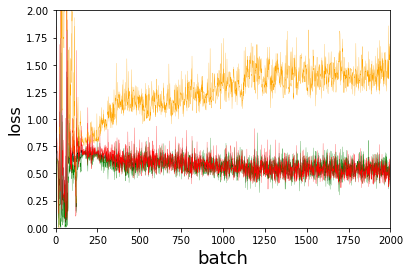

In [11]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()


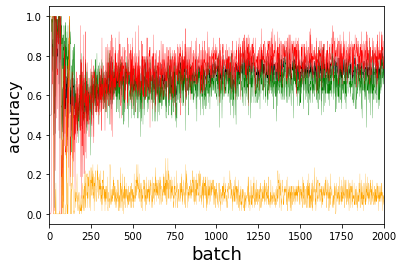

In [12]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()